In [544]:
import pandas as pd
import numpy as np

In [545]:
pl=pd.read_csv('prosperLoanData.csv')

In [546]:
pd.set_option("display.max_columns", len(pl.columns))
pl.sample(5)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
21449,4BF53419418329010686881,317493,2008-04-24 12:19:43.413000000,AA,36,Completed,2011-05-06 00:00:00,0.12700,0.1200,0.1100,NaN,NaN,NaN,NaN,NaN,NaN,4,NY,Social Worker,Full-time,11.0,False,False,NaN,2008-04-24 12:05:01.130000000,760.0,779.0,1995-12-06 00:00:00,12.0,11.0,22.0,10,101.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,500.0,0.01,22645.0,22.0,1.00,2.0,0.16,"$25,000-49,999",True,3833.333333,D6E334200624255817F390E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,70,30629,15000,2008-05-06 00:00:00,Q2 2008,85513418047647103B1AA13,491.89,17941.88,15000.01,2941.87,-245.16,0.0,0.0,0.0,0.0,1.000,0,0,0.0,407
28491,7AA3353875603235900D6AC,555491,2012-01-30 16:45:42.943000000,NaN,36,Completed,2013-03-11 00:00:00,0.35797,0.3177,0.3077,0.28960,0.1650,0.12460,1.0,HR,5.0,1,IL,Other,Employed,274.0,False,False,NaN,2012-03-08 13:21:30,700.0,719.0,1989-09-18 00:00:00,14.0,13.0,41.0,11,341.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,5736.0,0.26,15671.0,36.0,0.97,5.0,0.34,"$25,000-49,999",True,3633.333333,FDA33645548737681A7EC3A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,24,61983,4000,2012-03-14 00:00:00,Q1 2012,1CE535381722405654700B8,173.71,5135.01,4000.00,1135.01,-35.71,0.0,0.0,0.0,0.0,1.000,0,0,0.0,14
23886,CB65356128839372776E7F6,654950,2012-10-16 12:10:25.363000000,NaN,36,Current,NaN,0.35797,0.3177,0.3077,0.27990,0.1675,0.11240,1.0,HR,4.0,15,IL,Teacher,Self-employed,5.0,False,False,NaN,2012-10-16 12:10:24,680.0,699.0,1987-03-06 00:00:00,3.0,2.0,10.0,2,86.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2878.0,0.87,422.0,10.0,1.00,0.0,NaN,"$25,000-49,999",False,3333.333333,326D36651406770362AEF5E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77475,2385,2012-11-09 00:00:00,Q4 2012,A4AA35600454431648FA5A3,103.57,1553.55,732.48,821.07,-25.84,0.0,0.0,0.0,0.0,0.795,0,0,0.0,36
84737,3D953598941100644F6EE0F,1116449,2014-01-04 10:19:59.303000000,NaN,60,Current,NaN,0.21474,0.1905,0.1805,0.16717,0.0849,0.08227,4.0,C,6.0,1,OH,Skilled Labor,Employed,132.0,False,False,NaN,2014-01-04 10:19:59,640.0,659.0,2003-06-26 00:00:00,13.0,13.0,22.0,11,445.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,12579.0,0.92,685.0,21.0,0.95,3.0,0.36,"$50,000-74,999",True,4590.000000,886A3702123746021742C62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,124713,15000,2014-01-08 00:00:00,Q1 2014,2DFA370230170651385656B,389.52,389.52,146.83,242.69,-12.74,0.0,0.0,0.0,0.0,1.000,0,0,0.0,127
113765,DE393586895011134F40215,868954,2013-08-13 11:46:15.580000000,NaN,60,Current,NaN,0.21156,0.1874,0.1

In [547]:
pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [548]:
missing= pl.isnull().sum()
missing

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

### Dropping unnecessary columns of the data and the columns which have  more than 80% of  missing values

In [549]:
to_drop = ['ListingKey','ListingNumber','ListingCreationDate','GroupKey','LoanKey','LoanNumber',
            'MemberKey','LoanFirstDefaultedCycleNumber','LoanOriginationDate','DateCreditPulled',
           'TotalProsperLoans','TotalProsperPaymentsBilled','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate',
           'ProsperPaymentsOneMonthPlusLate','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding',
           'ScorexChangeAtTimeOfListing']


In [550]:
pl.drop(to_drop,inplace=True, axis=1)

In [551]:
# Extracting the numerical features of the data
numeric=pl.select_dtypes(exclude=['object'])


In [552]:
# See the numeric data
numeric.sample(5)

,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
97188,36,0.33051,0.2909,0.2809,0.26810,0.1425,0.12560,2.0,6.0,1,1.0,False,False,660.0,679.0,7.0,7.0,41.0,4,80.0,3.0,6.0,0.0,0.0,15.0,0.0,0.0,1746.0,0.08,17754.0,38.0,0.71,0.0,NaN,False,5416.666667,0,17,4000,167.82,4340.3200,4000.00,340.3200,-11.19,-54.51,0.0,0.0,0.0,1.0,0,0,0.0,59
60629,36,0.06726,0.0605,0.0505,0.05000,0.0074,0.04260,7.0,11.0,1,18.0,True,False,760.0,779.0,24.0,22.0,51.0,19,678.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,30048.0,0.27,67355.0,47.0,1.00,2.0,0.26,True,6250.000000,0,1,17000,517.56,0.0000,0.00,0.0000,0.00,0.00,0.0,0.0,0.0,1.0,0,0,0.0,1
49773,36,0.16215,0.1550,0.1250,NaN,NaN,NaN,NaN,NaN,0,28.0,False,True,680.0,699.0,13.0,9.0,39.0,8,331.0,3.0,4.0,0.0,0.0,28.0,0.0,0.0,6688.0,0.37,9136.0,23.0,0.73,0.0,0.31,True,5583.333333,0,84,9900,333.80,12124.5700,9900.00,2224.5700,-164.78,0.00,0.0,0.0,0.0,1.0,1,0,0.0,318
42600,36,0.09030,0.0769,0.0669,0.06546,0.0174,0.04806,7.0,8.0,1,64.0,True,False,740.0,759.0,7.0,5.0,14.0,3,141.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3185.0,0.49,3315.0,11.0,0.91,1.0,0.22,True,4166.666667,0,2,10000,311.94,309.8332,246.63,63.2032,-8.49,0.00,0.0,0.0,0.0,1.0,0,0,0.0,1
47738,36,0.24246,0.2049,0.1949,0.19040,0.0890,0.10140,4.0,7.0,13,164.0,True,False,640.0,659.0,11.0,10.0,31.0,7,513.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,21749.0,0.16,9223.0,27.0,0.96,1.0,0.26,True,4583.333333,0,25,4000,149.65,3591.6000,2388.53,1203.0700,-58.73,0.00,0.0,0.0,0.0,1.0,0,0,0.0,81


In [553]:
numeric.describe()

,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,152.816539,31.896882,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,466.320254,29.974184,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,1.000000,26.000000,660.000000,679.000000,7.000000,6.000000,17.000000,4.00000,114.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.121000e+03,0.310000,880.000000,15.000000,0.820000,0.000000,0.140000,3.200333e+03,0.000000,6.000000,4000.00000,131.620000,1005.760000,500.890000,274.870000,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,1.000000,67.000000,680.000000,699.000000,10.000000,9.000000,25.000000,6.00000,271.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.549000e+03,0.600000,4100.000000,22.000000,0.940000,0.0

In [554]:
# Numeric data information

numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 53 columns):
Term                                  113937 non-null int64
BorrowerAPR                           113912 non-null float64
BorrowerRate                          113937 non-null float64
LenderYield                           113937 non-null float64
EstimatedEffectiveYield               84853 non-null float64
EstimatedLoss                         84853 non-null float64
EstimatedReturn                       84853 non-null float64
ProsperRating (numeric)               84853 non-null float64
ProsperScore                          84853 non-null float64
ListingCategory (numeric)             113937 non-null int64
EmploymentStatusDuration              106312 non-null float64
IsBorrowerHomeowner                   113937 non-null bool
CurrentlyInGroup                      113937 non-null bool
CreditScoreRangeLower                 113346 non-null float64
CreditScoreRangeUpper               

In [555]:
# Converting boolean numeric datatype to categorical datatype
convert_bool=['IsBorrowerHomeowner','CurrentlyInGroup',
              'IncomeVerifiable']
pl[convert_bool]=pl[convert_bool].astype('object')


In [556]:
pl.IsBorrowerHomeowner.dtype

dtype('O')

In [557]:
from sklearn.preprocessing import Imputer
my_imputer=Imputer()
p_nf= my_imputer.fit_transform(numeric)

In [558]:
columns=numeric.columns

In [559]:
p_nf=pd.DataFrame(p_nf,columns=columns)

In [560]:
p_nf=p_nf.join(pl['LoanStatus'])

### Since our aim is to predict the defaulted LoanStatsus class, we are not concerned with the variable type 'current', hence we are deleting the observations corresponding to 'current' LoanStatus 

In [561]:
p_nf=p_nf[p_nf['LoanStatus']!='Current']

In [562]:
p_nf.describe()

,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,5.736100e+04,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.000000,57361.00000,57361.000000,57361.000000,57361.000000
mean,37.199142,0.223846,0.201634,0.191509,0.173659,0.087136,0.101830,3.859018,6.060646,2.468663,83.535575,0.470703,0.207406,672.575975,691.575975,9.680705,8.482232,25.372691,6.102282,327.232614,2.008826,7.034594,0.887391,1055.143997,4.571441,0.330833,0.022259,1.594458e+04,0.536056,10820.754707,22.018469,0.861276,0.892902,0.288683,0.921079,5070.249904,303.541744,54.074737,6340.889193,225.871821,5843.777444,4694.286173,1149.491271,-54.433917,-26.463754,1391.306897,1353.515584,49.941289,0.998504,0.08633,0.044420,32.297477,103.490961
std,7.649302,0.087876,0.080952,0.080409,0.056742,0.038683,0.026931,1.279408,1.639899,3.484849,79.432991,0.499145,0.405452,80.420834,80.420834,5.195364,4.649442,14.165683,4.522936,446.585964,3.085746,8.027742,2.549488,6254.638886,10.592425,0.781687,0.167188,3.149434e+04,0.325737,20426.383102,11.580767,0.161042,1.151214,0.699063,0.269618,5644.529440,621.437677,26.879218,5248.411068,185.718573,5601.569794,4858.253549,1198.601164,59.017261,151.544802,3220.373358,3182.266984,386.907614,0.018478,0.44570,0.321445,413.801196,108.269124
min,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.00000,0.000000,0.000000,1.000000
25%,36.000000,0.152110,0.136400,0.125900,0.168661,0.080306,0.096068,3.000000,5.950067,0.000000,25.000000,0.000000,0.000000,640.000000,659.000000,6.000000,5.000000,15.000000,3.000000,61.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.158000e+03,0.270000,739.000000,14.000000,0.800000,0.000000,0.130000,1.000000,2833.333333,0.000000,28.000000,2800.000000,100.710000,2000.760000,1242.040000,338.780000,-74.150000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,30.000000
50%,36.000000,0.217390,0.198000,0.185000,0.168661,0.080306,0.096068,4.072243,5.950067,1.000000,67.000000,0.000000,0.000000,680.000000,

## Visualization Section

### Target Variable : Loan Status 

In [563]:
ymulti=pl['LoanStatus']

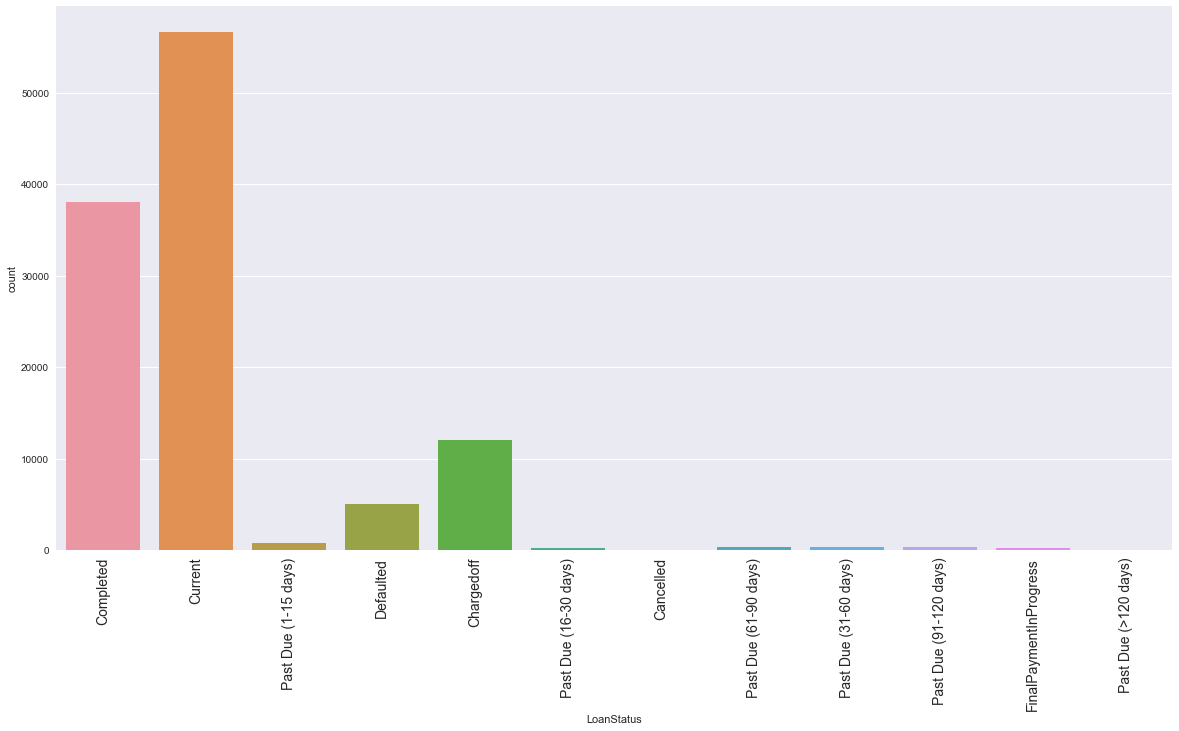

In [564]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot()
plt.xticks(fontsize=14, rotation=90)
sns.countplot(ymulti)

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64


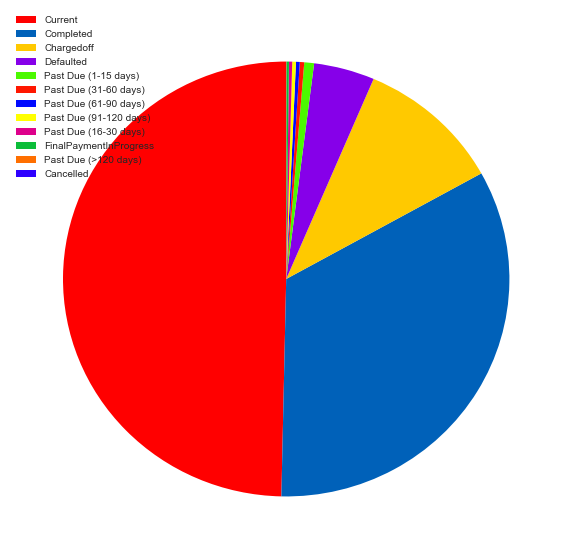

In [565]:
#Plot a histogram of frequencies
from random import shuffle


slices = [1,2,3] * 4 + [20, 25, 30] * 2
shuffle(slices)

fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)

cmap = plt.cm.prism
colors = cmap(np.linspace(0., 1., len(slices)))


sizes= pl.LoanStatus.value_counts()
labels = [r'Current', r'Completed', r'Chargedoff', r'Defaulted',
          r'Past Due (1-15 days)', r'Past Due (31-60 days)', r'Past Due (61-90 days)', r'Past Due (91-120 days)',
          r'Past Due (16-30 days)', r'FinalPaymentInProgress', r'Past Due (>120 days)', r'Cancelled']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
print(sizes)

From the above visualization, Current loan status ranks the highest with almost nearly half of the dataset, followed by 'Completed' loan status with almost 39000 counts. Chargedoff and default follows the ranking list and the rest are fractionally distributed.

### Binary transformation of Loan Status

In [566]:
data_new=(p_nf['LoanStatus']=='Completed').astype(int)

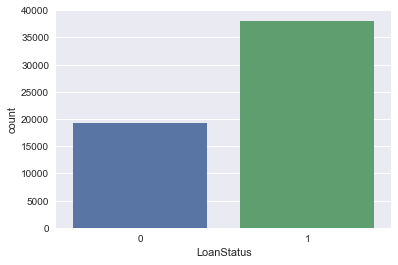

In [567]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig = plt.figure()

ax1 = fig.add_subplot(111)

sns.countplot(data_new)

The current status of loan is removed from the vizualization as that is not part of the goals of the project. We only focus on historical data to build a predictive model.Further, all other classes of loan status are divided into binary format, categorizing them into good loans vs. bad loans. The one status is Completed which is a good loan and the other class has the mixture of all other sub classees such as Chargedoff,Defaulted,Past Due (1-15 days), Past Due (31-60 days), Past Due (61-90 days), Past Due (91-120 days), Past Due (16-30 days), FinalPaymentInProgress, Past Due (>120 days), Cancelled and these are bad loans.

From the above bar chart, we can conclude that the majority class is of 1 i.e completed and the other class of 0 has about half the data of the completed class. 
Our sole focus is on the class '0' which is bad loans and is considered to be a true class for our analysis.


## Exploring Numeric information of the data

In [568]:
p_nf["LoanStatus"]=(p_nf['LoanStatus']=='Completed').astype(int)

### Employment status duration 

(0, 300)

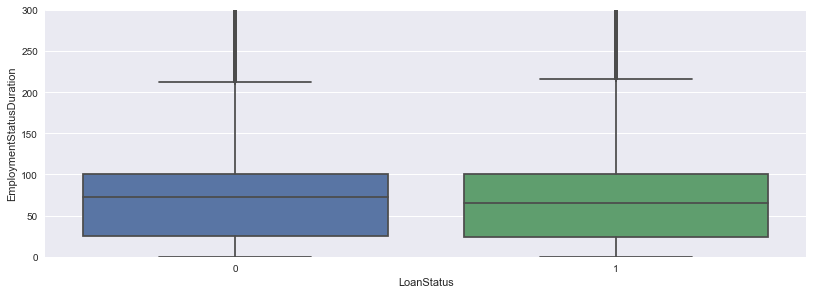

In [569]:
fig = plt.figure(figsize=(30, 10))

ax2 = fig.add_subplot(222)
sns.boxplot(x="LoanStatus", y="EmploymentStatusDuration", data=p_nf).set_ylim([0,300])

The box plot shows the median status duration falls around 50 for both categories of loans. The lower and upper qaurtile including the range also dosen't really differ for Loan Status. It is quite evident from this plot that there is hardly a relationship between EmploymentStatusDuration and loan default. 

### Income metrics - Stated Monthly Income and Debt to Income Ratio

(array([0, 1]), <a list of 2 Text xticklabel objects>)

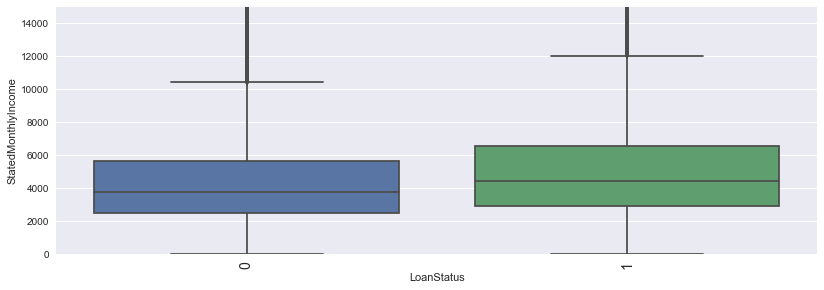

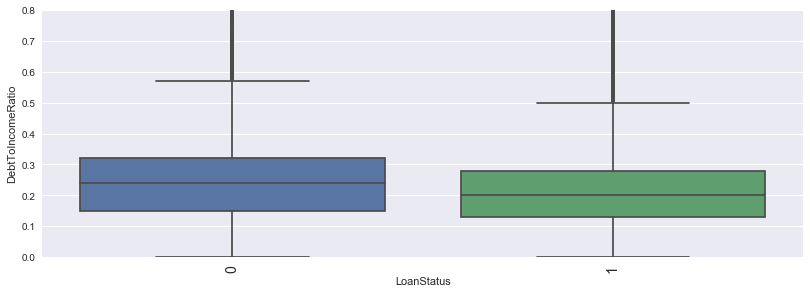

In [570]:
# Box plot for Stated Montly Income variable
fig = plt.figure(figsize=(30, 10))

ax1 = fig.add_subplot(221)
sns.boxplot(x="LoanStatus", y="StatedMonthlyIncome", data=p_nf).set_ylim([0,15000])
plt.xticks(fontsize=14, rotation=90)

# Box plot for Debt to Income ratio variable

fig = plt.figure(figsize=(30, 10))

ax2 = fig.add_subplot(222)
sns.boxplot(x="LoanStatus", y="DebtToIncomeRatio", data=p_nf).set_ylim([0,0.8])
plt.xticks(fontsize=14, rotation=90)

We observed the state monthly income and the debt to income ratio have a relationship with default i.e People with higher stated incomes defaulted less often than those with lower incomes. The range for monthly income for good loan status is also higher comparitively. People with higher debt to income ratio have more defaulted loans.

### Borrower Rate and Lender Yield

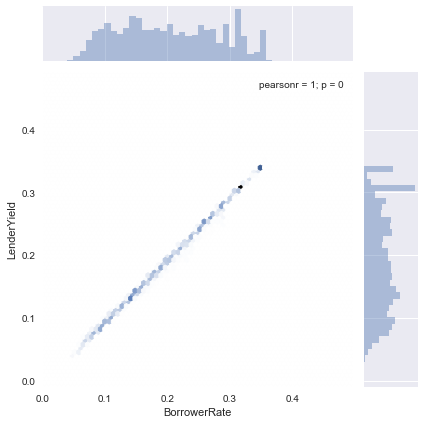

In [571]:
fig = plt.figure(figsize=(50, 30))

sns.jointplot(x='BorrowerRate',y='LenderYield',kind='hex', data=p_nf)

The above jointplot shows almost a perfect positive correlation between LenderYield and BorrowerRate. Higher the rate, higher is the lender yield. This makes sense to the data.

### Credit scores: Prosper rating, Prosper Score, Credit Lower Range, Credit Upper Range

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

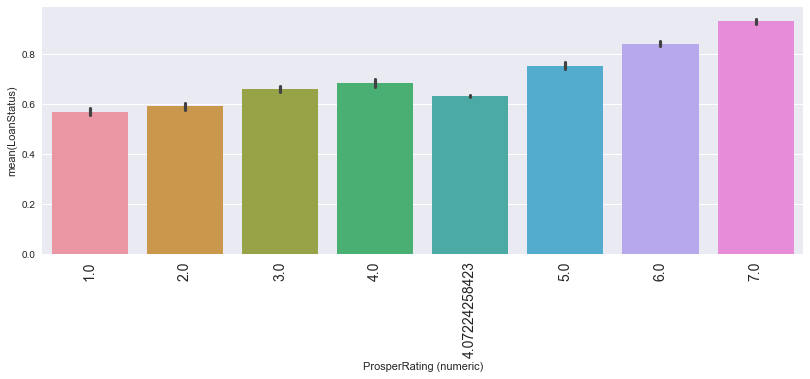

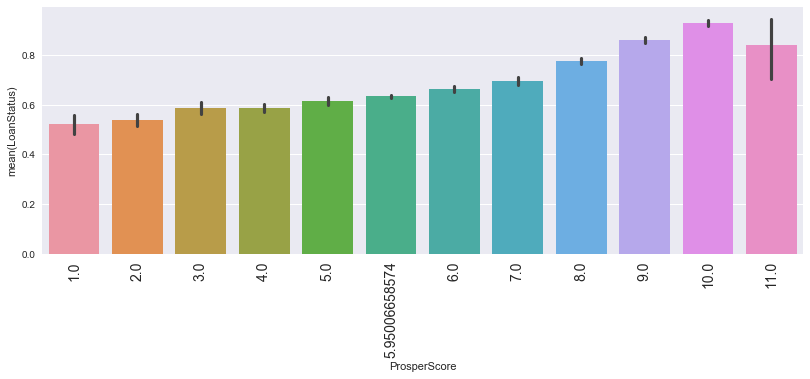

In [572]:
# ProsperRatingnumeric
fig = plt.figure(figsize=(30, 10))
ax1 = fig.add_subplot(221)
sns.barplot(x="ProsperRating (numeric)", y="LoanStatus", data=p_nf)
plt.xticks(fontsize=14, rotation=90)

#ProsperScore
fig = plt.figure(figsize=(30, 10))
ax2 = fig.add_subplot(222)
sns.barplot(x="ProsperScore", y="LoanStatus", data=p_nf)
plt.xticks(fontsize=14, rotation=90)

Higher the Prosper rating and ProsperScore, better the status of the loan being completed. Both the Prosper rating and Prosper score are linearly dependent on loan status and are doing pretty good in predicting the default. We can observe that as the rating number increases the prabability of loan being defaulted increases.There is some unusual behavior noticed at ProsperScore valued 11, it seems to default more than it's predecessors. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

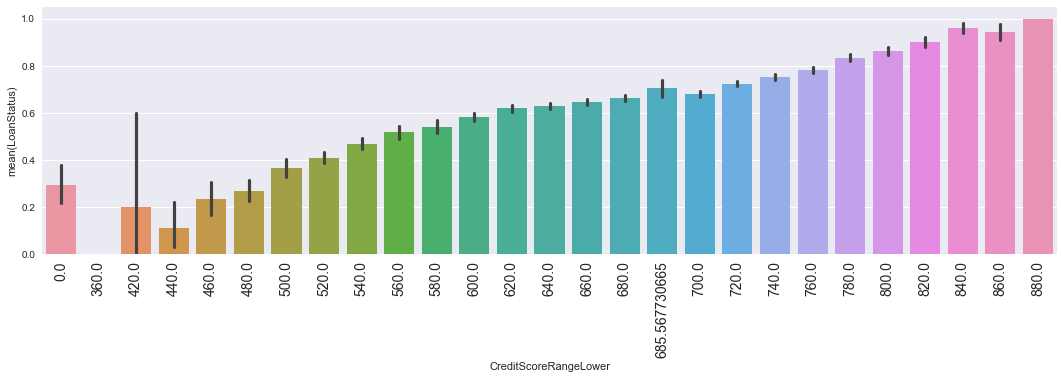

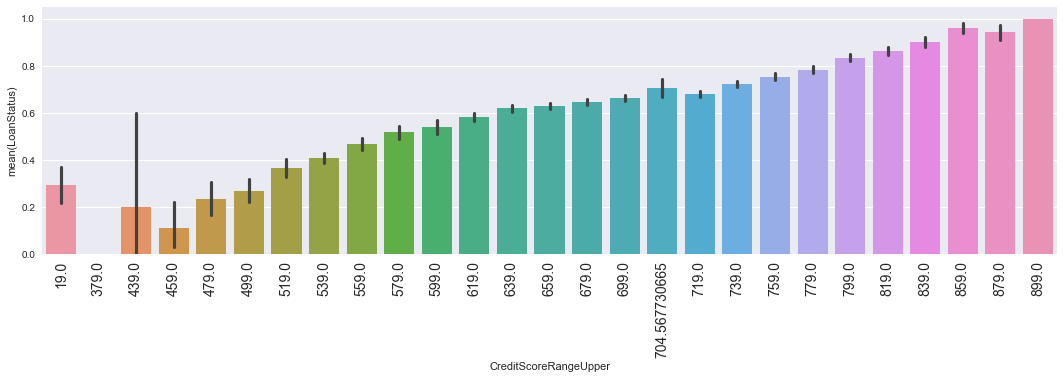

In [573]:
fig = plt.figure(figsize=(40, 10))
ax1 = fig.add_subplot(223)
sns.barplot(x="CreditScoreRangeLower", y="LoanStatus", data=p_nf)
plt.xticks(fontsize=14, rotation=90)

fig = plt.figure(figsize=(40, 10))
ax2 = fig.add_subplot(224)
sns.barplot(x="CreditScoreRangeUpper", y="LoanStatus", data=p_nf)
plt.xticks(fontsize=14, rotation=90)

It should be noted here that the credit score "range" seems to be constant and behaves the same.

### Credit History

(0, 20)

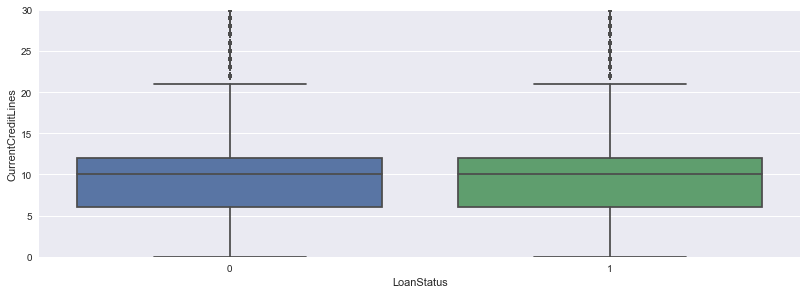

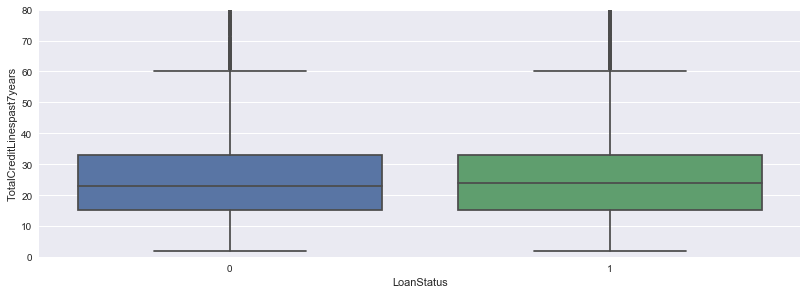

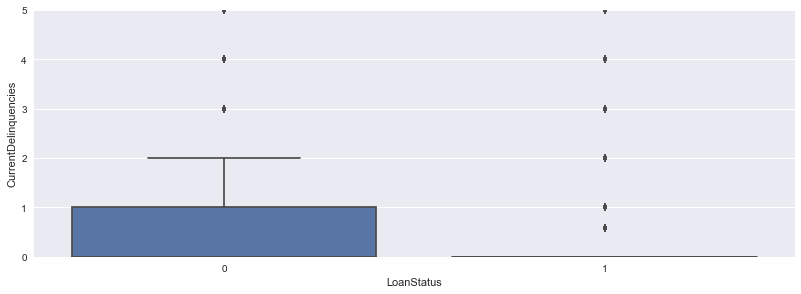

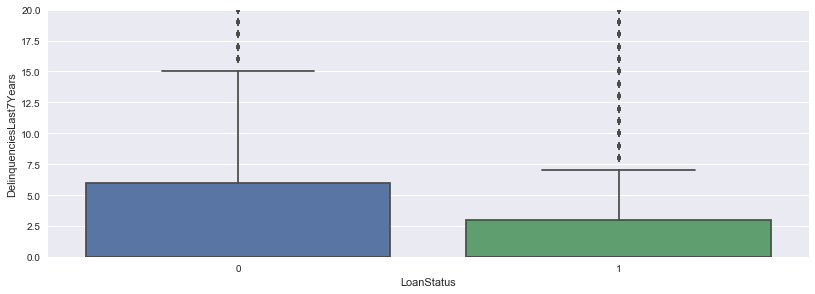

In [574]:
fig = plt.figure(figsize=(30, 10))

ax1 = fig.add_subplot(221)
sns.boxplot(x="LoanStatus", y="CurrentCreditLines", data=p_nf).set_ylim([0,30])

fig = plt.figure(figsize=(30, 10))
ax2 = fig.add_subplot(222)
sns.boxplot(x="LoanStatus", y="TotalCreditLinespast7years", data=p_nf).set_ylim([0,80])

fig = plt.figure(figsize=(30, 10))
ax3 = fig.add_subplot(223)
sns.boxplot(x="LoanStatus", y="CurrentDelinquencies", data=p_nf).set_ylim([0,5])

fig = plt.figure(figsize=(30, 10))
ax4 = fig.add_subplot(224)
sns.boxplot(x="LoanStatus", y="DelinquenciesLast7Years", data=p_nf).set_ylim([0,20])

Credit Lines dosen't have significant relationship with Loan Status. However Delinquencies does seem to have some mild relationship.

### Credit Information

(array([0, 1]), <a list of 2 Text xticklabel objects>)

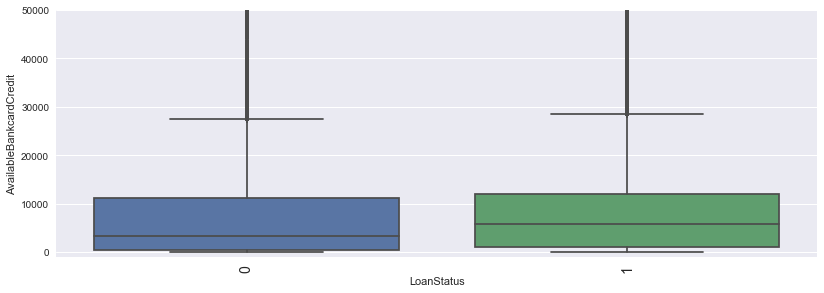

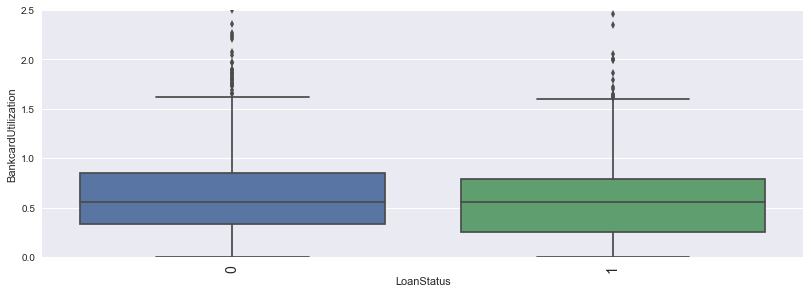

In [575]:
fig = plt.figure(figsize=(30, 10))
ax1 = fig.add_subplot(221)
sns.boxplot(x="LoanStatus", y="AvailableBankcardCredit", data=p_nf).set_ylim([-1000, 50000])
plt.xticks(fontsize=14, rotation=90)

fig = plt.figure(figsize=(30, 10))
ax2 = fig.add_subplot(222)
sns.boxplot(x="LoanStatus", y="BankcardUtilization", data=p_nf).set_ylim([0,2.5])
plt.xticks(fontsize=14, rotation=90)

Loans that are subject to default has lower available bank card credit. Bank card utilization seem to be constant with Loan Status, however lower the proportion of bankcard utilization, lower the probaability of default.

## Loan Characteristics

(10, 60)

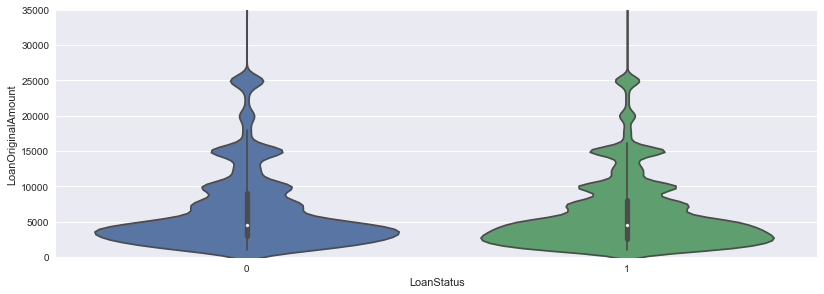

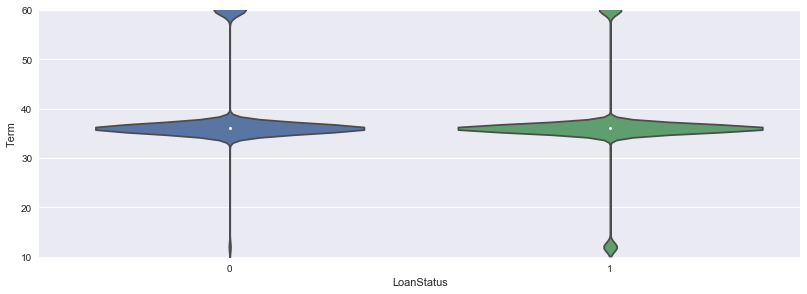

In [576]:
fig = plt.figure(figsize=(30, 10))
ax1 = fig.add_subplot(221)
sns.violinplot(x="LoanStatus", y="LoanOriginalAmount", data=p_nf).set_ylim([0,35000])

fig = plt.figure(figsize=(30, 10))
ax2 = fig.add_subplot(222)
sns.violinplot(x="LoanStatus", y="Term", data=p_nf).set_ylim([10, 60])


The violin plot helps in explaining the distribution of most of the points involved in the plot. In the above plots, the distribution appears to be similar for both variables against Loan Status.


### Borrower Rate

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6]),
 <a list of 8 Text xticklabel objects>)

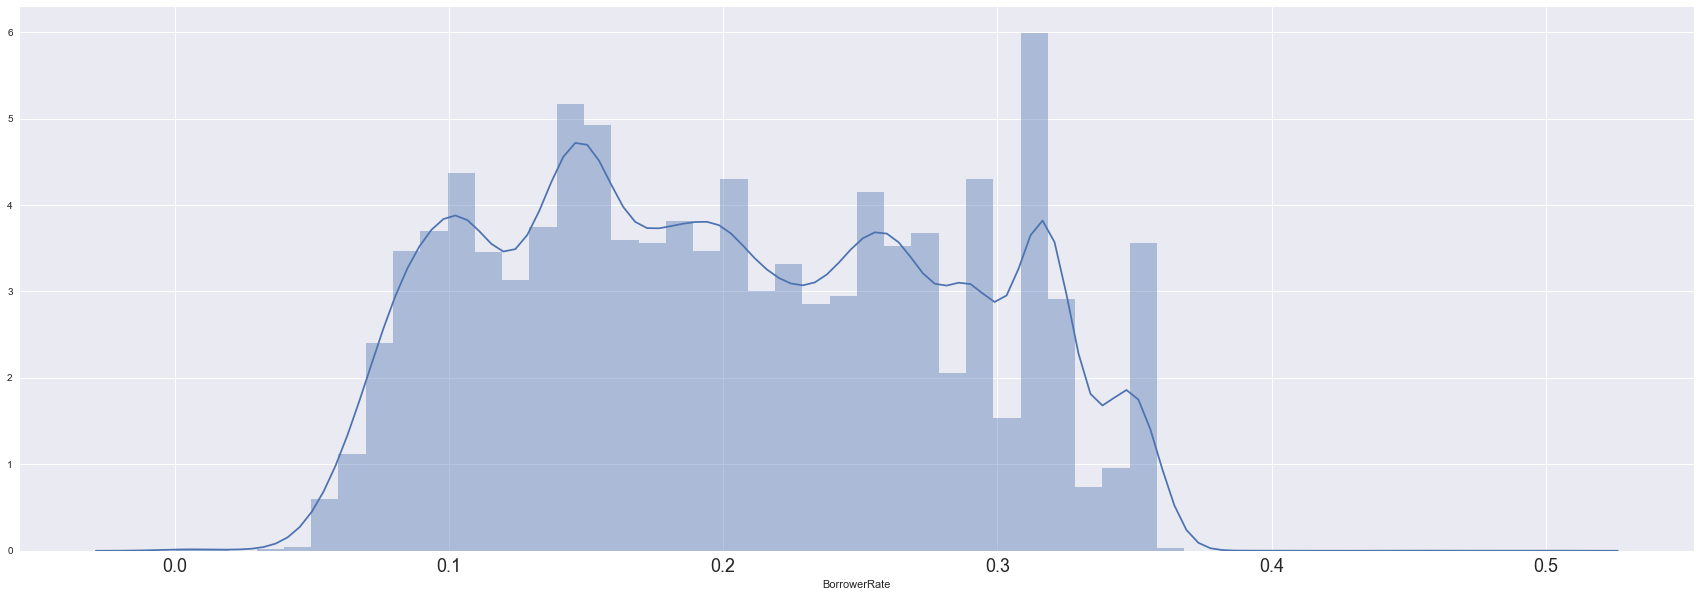

In [577]:
fig = plt.figure(figsize=(30, 10))

sns.distplot(p_nf["BorrowerRate"])
plt.xticks(fontsize=18)

In [578]:
p_nf['BorrowerRate'].describe()

count    57361.000000
mean         0.201634
std          0.080952
min          0.000000
25%          0.136400
50%          0.198000
75%          0.269900
max          0.497500
Name: BorrowerRate, dtype: float64

Borrower Rate is normally distributed with a mean interest rate of 20.16%. Upper quartile is paying an interest upto 27%, while the lower quartile is paying upto 17% interest rate.


### LenderYield

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6]),
 <a list of 8 Text xticklabel objects>)

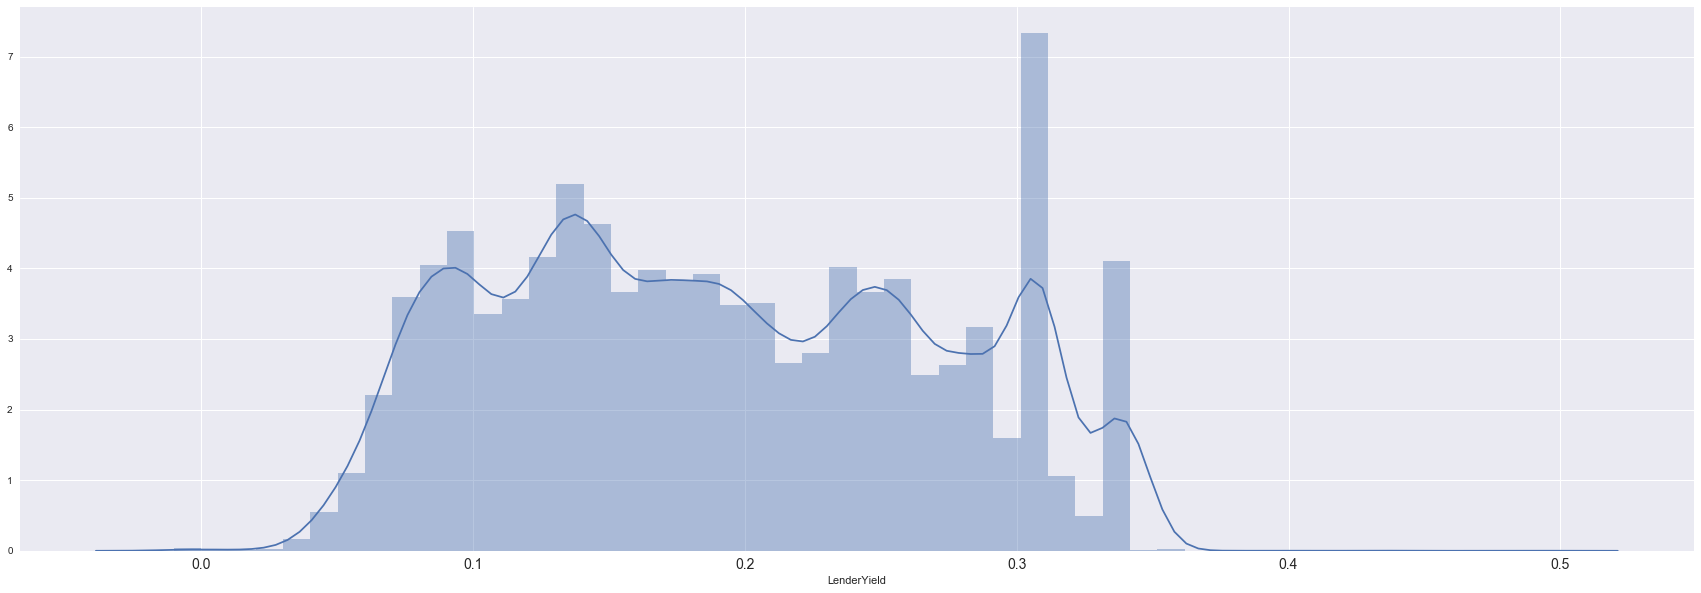

In [579]:
fig = plt.figure(figsize=(30, 10))

sns.distplot(p_nf["LenderYield"])
plt.xticks(fontsize=14)

In [580]:
p_nf.drop('LoanStatus', inplace=True, axis=1)

Lender yield distribution is normally distributed, mean of this distribution is around 0.19 and there is an yield with sharp peak ranging around 0.5, seems like this yield on the loan is with higher interest rate.

### 2) Exploring the categorical information of the data

In [581]:
p_c=pl.select_dtypes(include=['object'])
p_c.columns

Index(['CreditGrade', 'LoanStatus', 'ClosedDate', 'ProsperRating (Alpha)',
       'BorrowerState', 'Occupation', 'EmploymentStatus',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'FirstRecordedCreditLine',
       'IncomeRange', 'IncomeVerifiable', 'LoanOriginationQuarter'],
      dtype='object')

In [582]:
p_c.drop(['ProsperRating (Alpha)','ClosedDate'],inplace=True, axis=1)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [583]:
p_c.isnull().sum()

CreditGrade                84984
LoanStatus                     0
BorrowerState               5515
Occupation                  3588
EmploymentStatus            2255
IsBorrowerHomeowner            0
CurrentlyInGroup               0
FirstRecordedCreditLine      697
IncomeRange                    0
IncomeVerifiable               0
LoanOriginationQuarter         0
dtype: int64

In [584]:
p_c.fillna('Unknown', inplace=True)

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:2842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [585]:
p_c.isnull().sum()

CreditGrade                0
LoanStatus                 0
BorrowerState              0
Occupation                 0
EmploymentStatus           0
IsBorrowerHomeowner        0
CurrentlyInGroup           0
FirstRecordedCreditLine    0
IncomeRange                0
IncomeVerifiable           0
LoanOriginationQuarter     0
dtype: int64

In [586]:
p_c=p_c[p_c['LoanStatus']!='Current']

In [587]:
p_c["LoanStatus"]=(p_c['LoanStatus']=='Completed').astype(int)

### Listing Category

The data type of this variable is numeric by default because of different loan types being distinguished by numbers. It is important to convert this to categorical type for better interpretability and avoiding false ordinality.


In [588]:
data=pl[pl['LoanStatus']!='Current']

In [589]:
data["LoanStatus"]=(data['LoanStatus']=='Completed').astype(int)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [590]:
data.replace(to_replace={"ListingCategory (numeric)": 
                         {0: "Unknown", 1: "Debt", 2: "Reno", 3: "Business", 4: "Personal",
                          5: "Student", 6: "Auto", 7: "Other", 8: "Baby", 9: "Boat", 
                         10: "Cosmetic", 11: "Engagement", 12: "Green", 13: "Household",
                         14: "LargePurchase", 15: "Medical", 16: "Motorcycle", 17: "RV",
                         18: "Taxes", 19: "Vacation", 20: "Wedding"}}, inplace=True)

data.rename(index=str, columns={"ListingCategory (numeric)": "ListingCategory"}, inplace=True)


C:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:3485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)
C:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

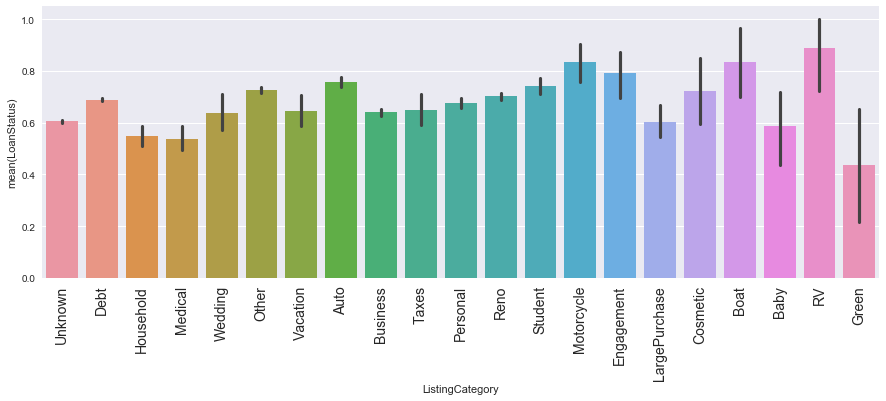

In [591]:
fig = plt.figure(figsize=(15, 5))

sns.barplot(x="ListingCategory", y="LoanStatus", data=data)

ax1 = fig.add_subplot(figsize=(30, 10))
plt.xticks(fontsize=14, rotation=90)

This visualization gives insights about probability of types of loans that are subject to good/ bad loans. Considering a threshold of 80% that makes excellent loans, loans such as 'Motorcycle','Engagement','Boat','RV' tend to complete their loans within the specified time.

It is evident to see 'Student' loans which is ususally a huge sum taken, to get completed almost 70% of their time.

Loans such as 'Household','Medical','LargerPurchase','Baby' complete their loans close to 60% of their time.These loans fall under common categories and usually have huge sums of loans taken, reason for which accounts to 60%.

'Green' loans are subjected to default almost 60% of their time. These loans are probably deemed as bad loans.

## Borrower State

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]), <a list of 52 Text xticklabel objects>)

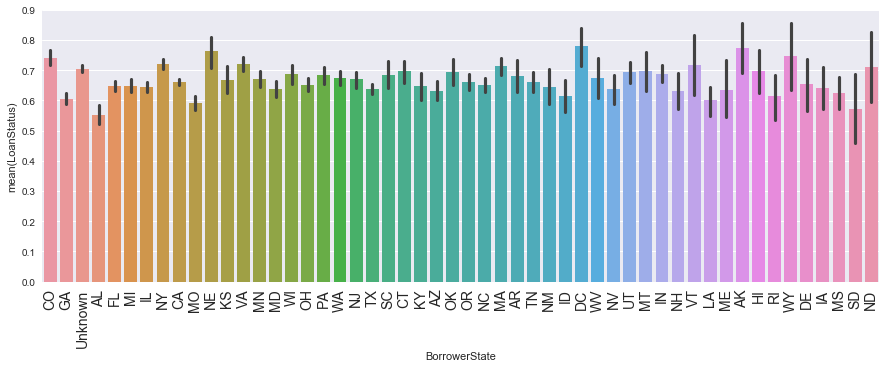

In [592]:
fig = plt.figure(figsize=(15, 5))

sns.barplot(x="BorrowerState", y="LoanStatus", data=p_c)


ax1 = fig.add_subplot(figsize=(30, 10))
plt.xticks(fontsize=14, rotation=90)

Fom the bar plot, we can see the non defaulted values of loan statuses of different states of USA. Alabama, Missouri and San Diego states 'Completed' loan average strikes between 50% and 60%. The largest non defaulted states are Nebraska and Washington DC followed by Arkansas, Wyoming and colorado ranging between 75% to 80% of their 'Completed loans'. This categorical data seems to give good insights.

## Occupation

(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 7 Text yticklabel objects>)

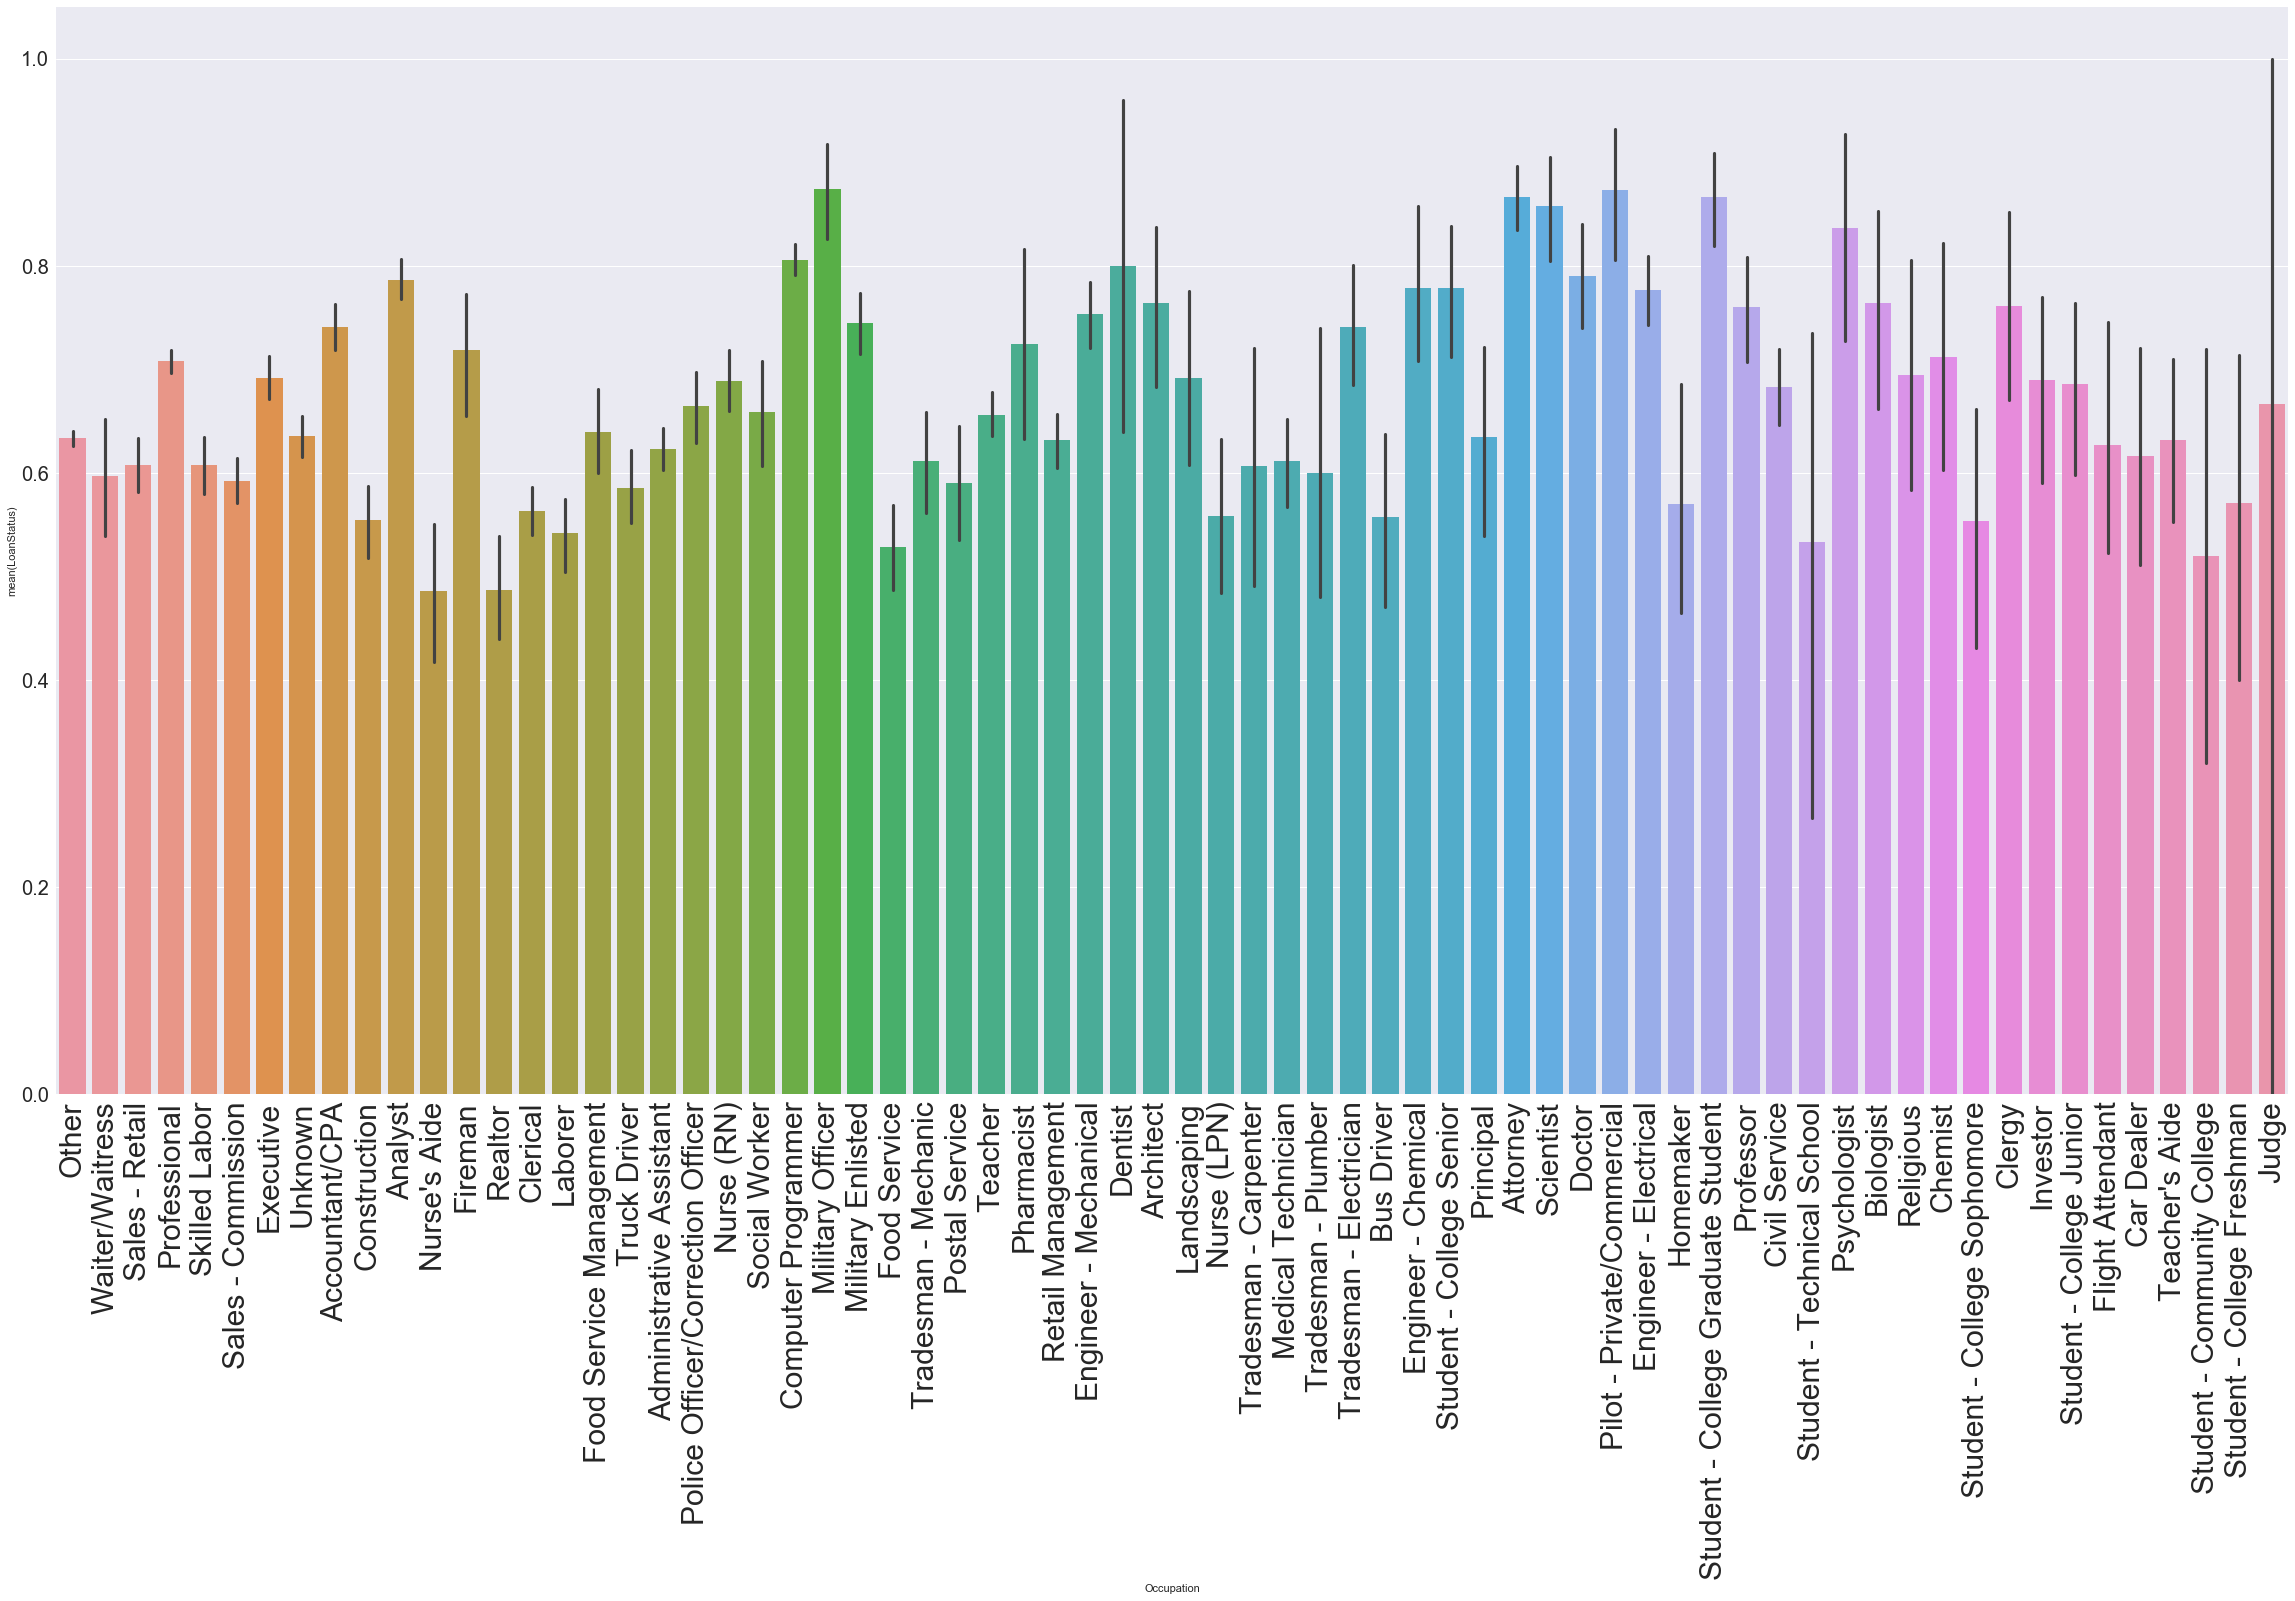

In [593]:
fig=plt.figure(figsize=(40,20))
sns.barplot(x='Occupation', y='LoanStatus', data=p_c)
plt.xticks(fontsize=30, rotation=90)
plt.yticks(fontsize=20)


Setting a threshold of 80% and greater to be the top occupations that result in good return of the loans, some of these include
'Military Officer','Computer Programmer','Dentist','Attorney','Scientist','Pilot','Student-College Graduate Student' and 'Psychologist'.
While occupations that have probability to complete the loans less than 50% include 'Nurse's Aide' and 'Realtor'.

## Is Borrower Home Owner

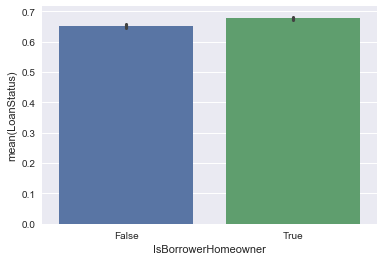

In [594]:
sns.barplot(x='IsBorrowerHomeowner', y='LoanStatus', data=p_c)

In [595]:
import scipy
from scipy.stats import pearsonr
x=data.IsBorrowerHomeowner
y=data.LoanStatus
cor, p= pearsonr(x, y)
print("The correlation between IsBorrowerHomeowner and loan default is {}, with a p-value of {}".format(cor, p))

The correlation between IsBorrowerHomeowner and loan default is 0.026500826075958207, with a p-value of 2.1818058327590924e-10


Looking at this plot, this variable has almost equal distribution in predicting loan status, however home owners tend to default less. Also the correlation is not so strong.So having information whether borrower is a home owner or not, dosen't really help in prediciting the status of loan payment.


## Employment Status

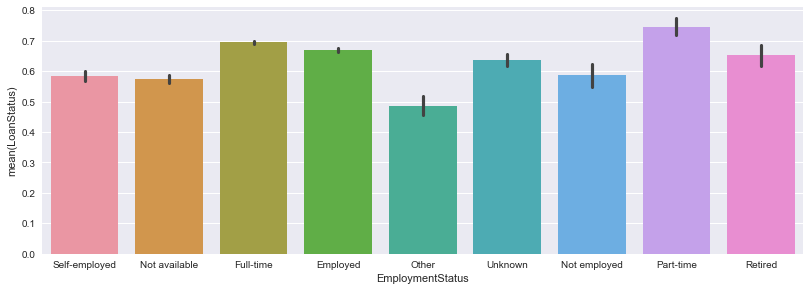

In [596]:
fig = plt.figure(figsize=(30, 10))

ax1 = fig.add_subplot(221)
sns.barplot(x="EmploymentStatus", y="LoanStatus", data=p_c)


EmploymentStatus has a relationship with default. We see a interesting observation here as part-time workers defaulted less often than the full-time workers and other employement status.
It is great to see Retired people having successful loan payment percentage close to 70%.Also, unfortunately the people who listed their employment status as Other defaulted even more often than those who were non employed.

## Feature Engineering: Numeric

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


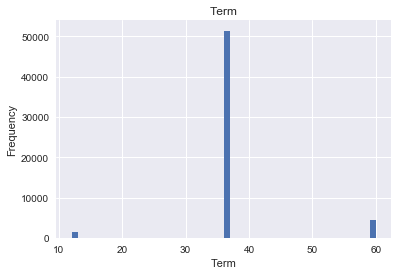

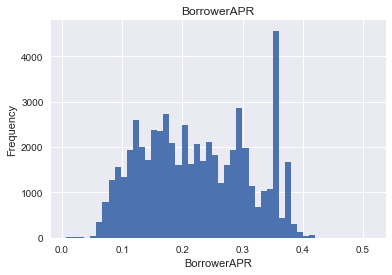

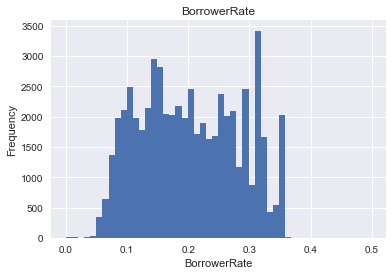

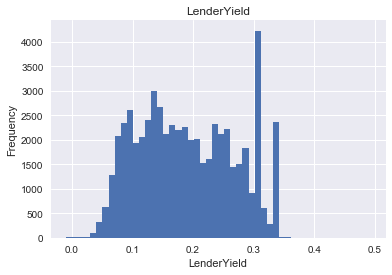

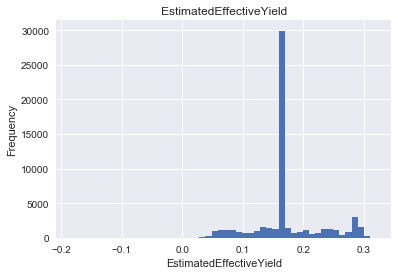

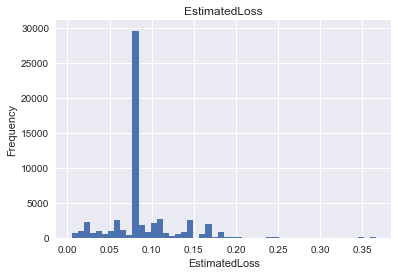

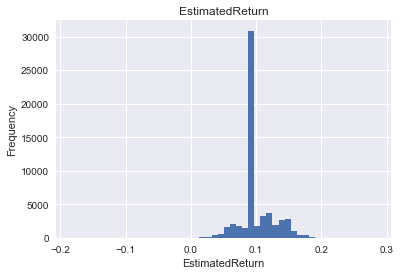

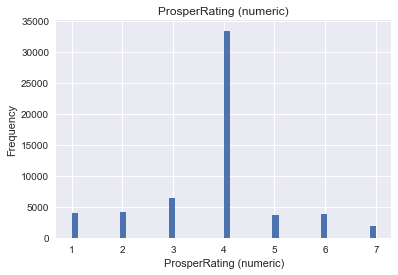

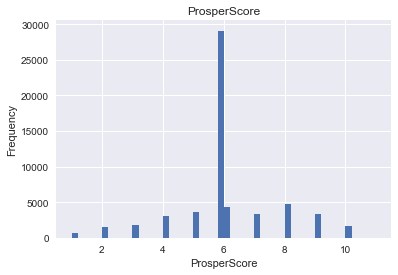

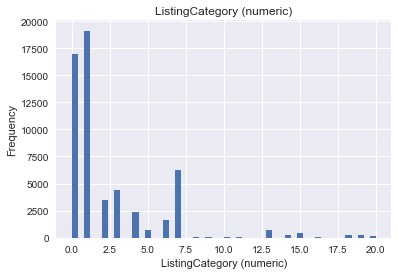

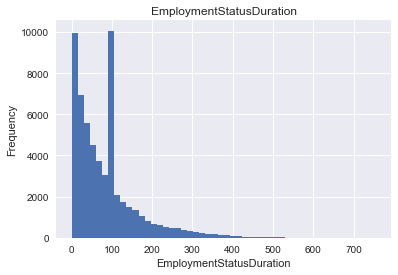

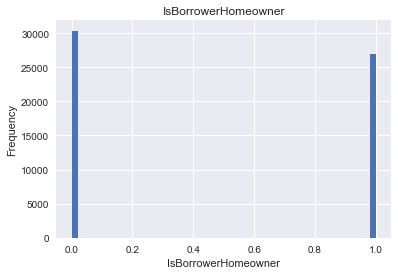

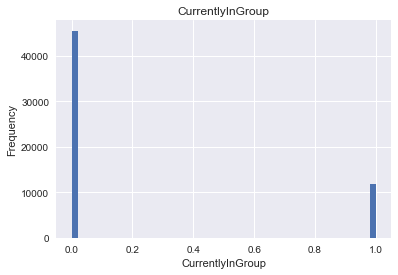

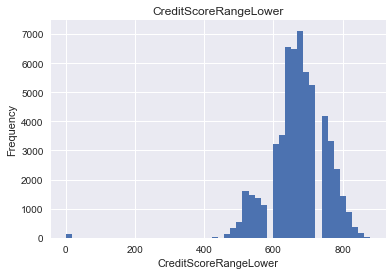

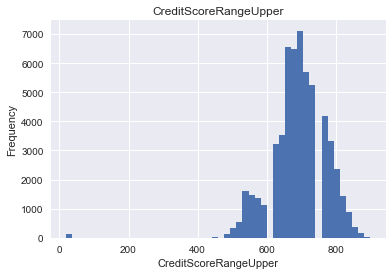

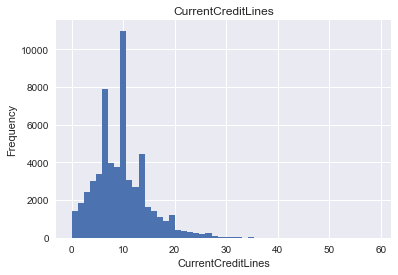

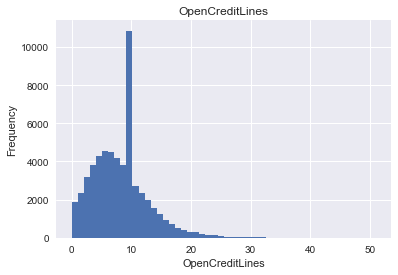

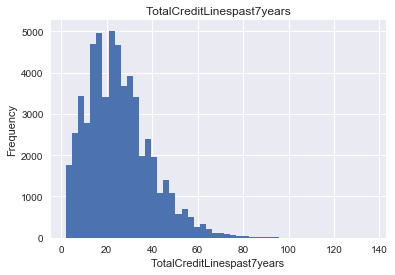

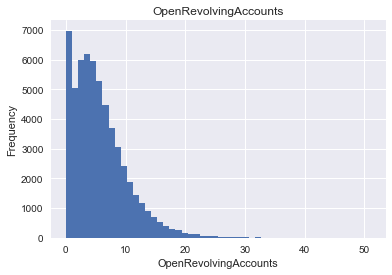

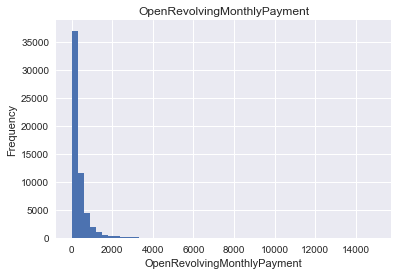

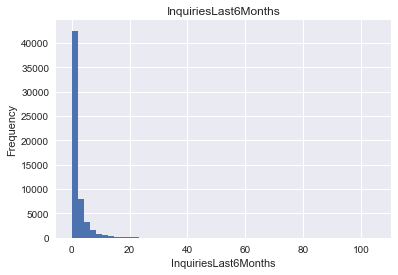

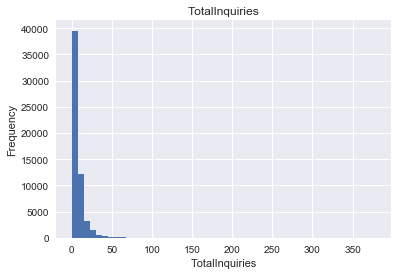

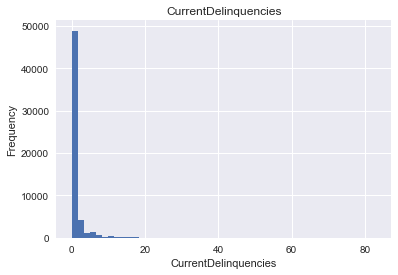

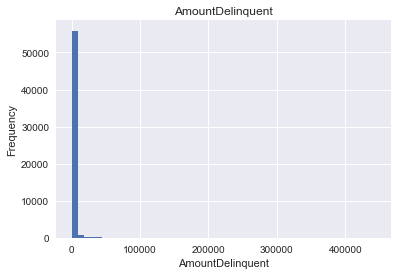

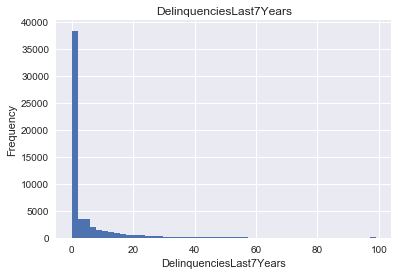

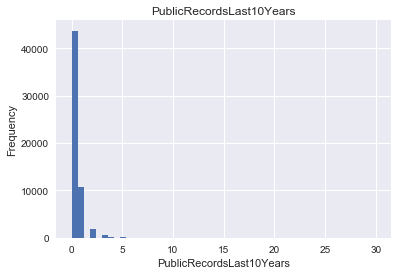

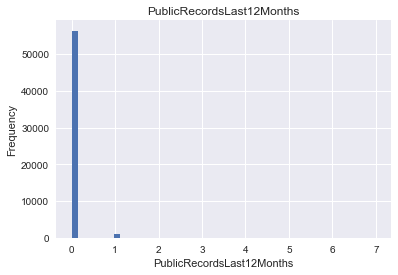

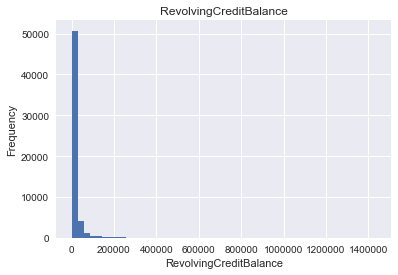

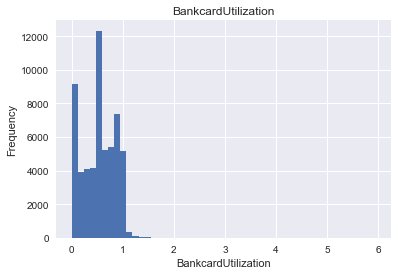

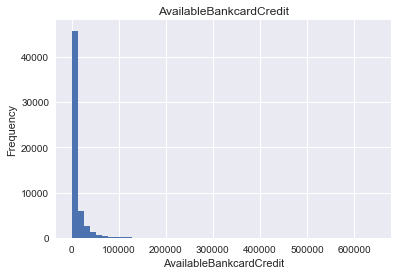

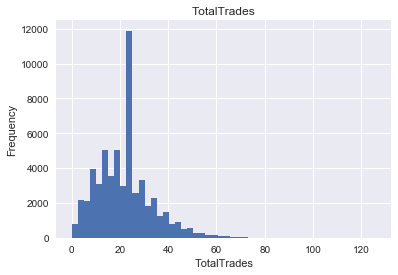

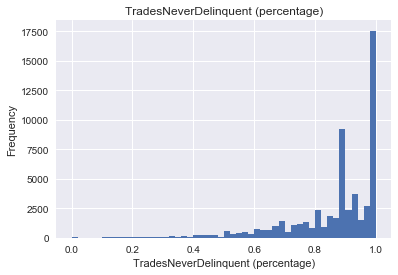

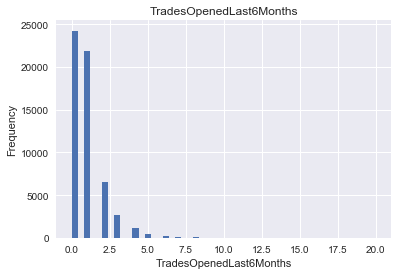

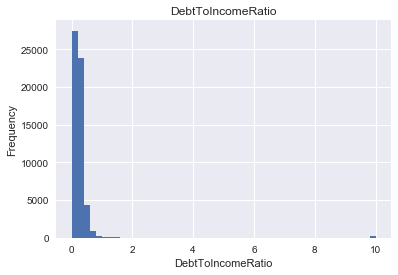

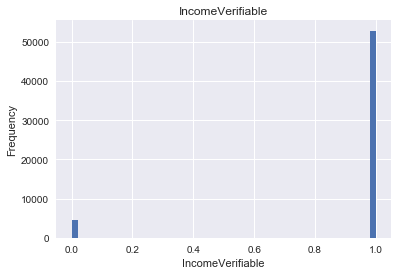

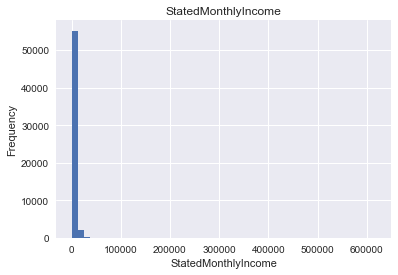

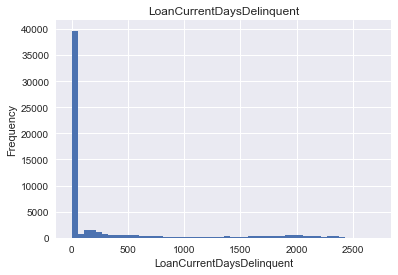

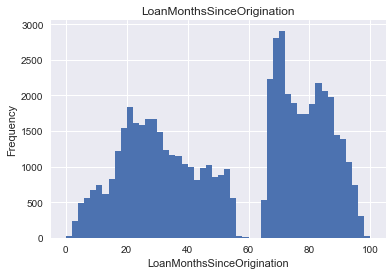

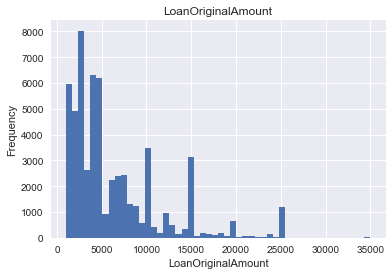

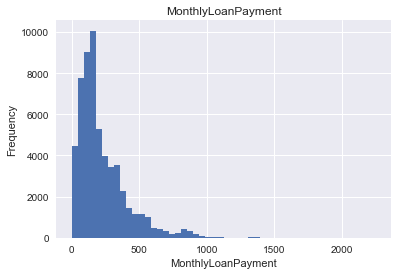

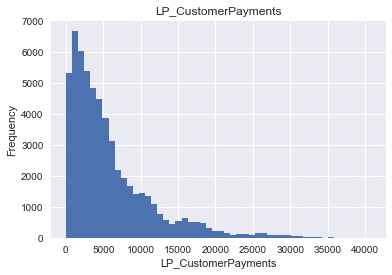

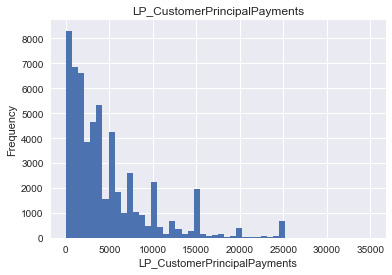

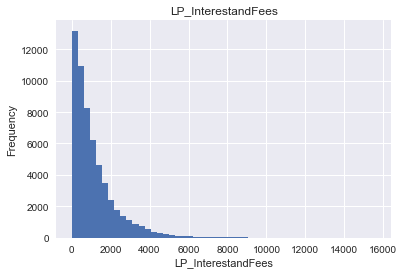

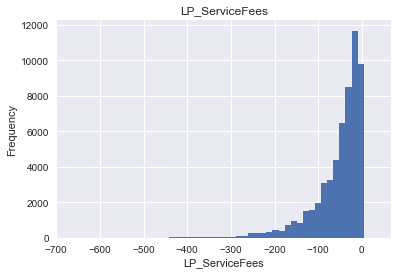

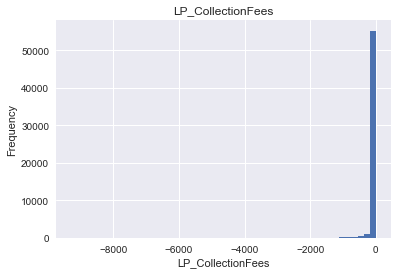

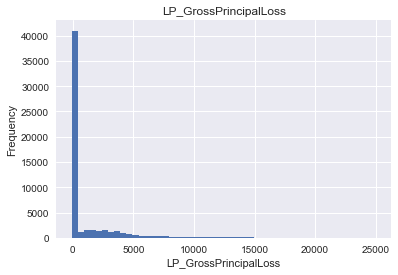

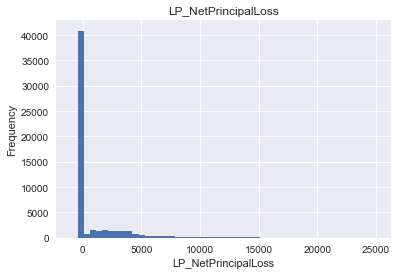

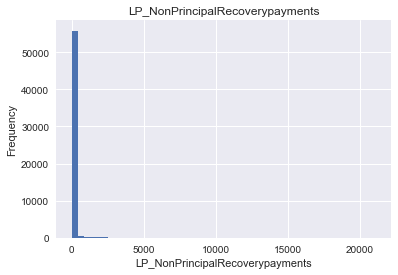

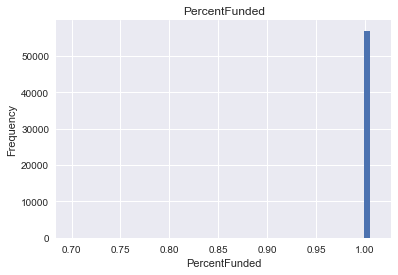

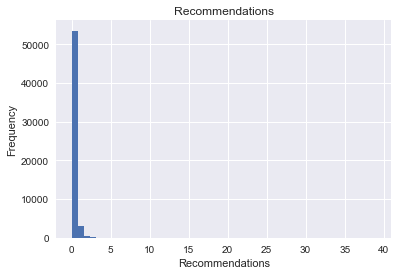

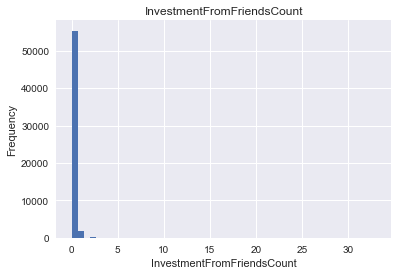

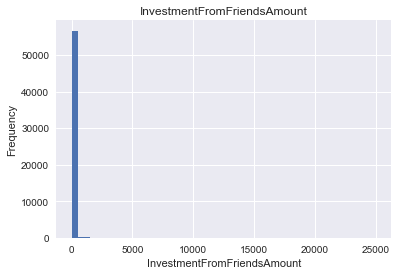

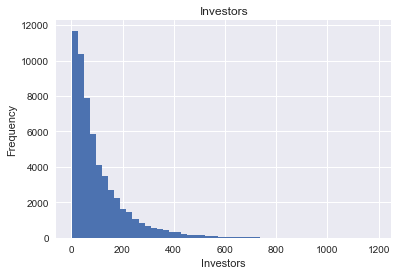

In [597]:
#NUMERICAL DATA

import matplotlib.pyplot as plt
%matplotlib inline

for i in p_nf.columns:
    fig, ax = plt.subplots()
    p_nf[i].hist(bins=50)
    ax.set_title(i)
    ax.set_xlabel(i)
    ax.set_ylabel('Frequency')
    

In [598]:
p_nf['LP_CustomerPrincipalPayments_log'] = np.log(1+(p_nf['LP_CustomerPrincipalPayments']))
p_nf['LP_CustomerPayments_log'] = np.log((1+ p_nf['LP_CustomerPayments']))
p_nf['LoanOriginalAmount_log'] = np.log((1+ p_nf['LoanOriginalAmount']))
p_nf['Investors_log'] = np.log((1+ p_nf['Investors']))
p_nf['MonthlyLoanPayment_log'] =np.log((1+ p_nf['MonthlyLoanPayment']))


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


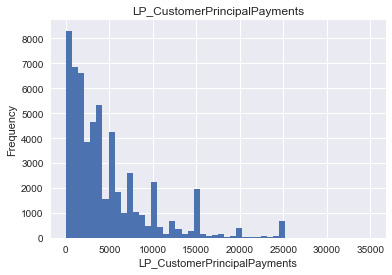

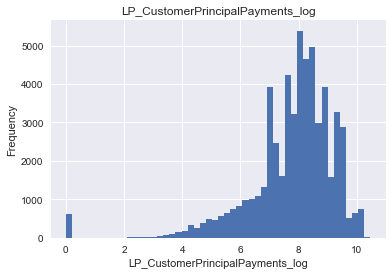

In [599]:
fig, ax = plt.subplots()
p_nf['LP_CustomerPrincipalPayments'].hist(bins=50)
ax.set_title('LP_CustomerPrincipalPayments')
ax.set_xlabel('LP_CustomerPrincipalPayments')
ax.set_ylabel('Frequency')

fig, ax = plt.subplots()
p_nf['LP_CustomerPrincipalPayments_log'].hist(bins=50)
ax.set_title('LP_CustomerPrincipalPayments_log')
ax.set_xlabel('LP_CustomerPrincipalPayments_log')
ax.set_ylabel('Frequency')


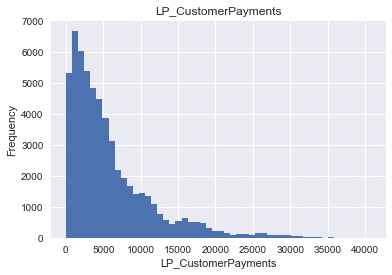

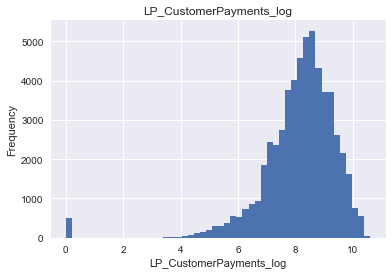

In [600]:

fig, ax = plt.subplots()
p_nf['LP_CustomerPayments'].hist(bins=50)
ax.set_title('LP_CustomerPayments')
ax.set_xlabel('LP_CustomerPayments')
ax.set_ylabel('Frequency')

fig, ax = plt.subplots()
p_nf['LP_CustomerPayments_log'].hist(bins=50)
ax.set_title('LP_CustomerPayments_log')
ax.set_xlabel('LP_CustomerPayments_log')
ax.set_ylabel('Frequency')

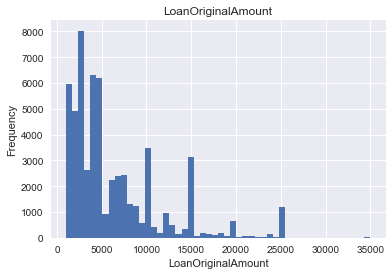

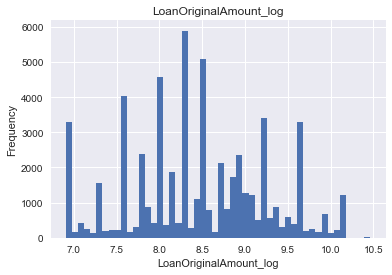

In [601]:

fig, ax = plt.subplots()
p_nf['LoanOriginalAmount'].hist(bins=50)
ax.set_title('LoanOriginalAmount')
ax.set_xlabel('LoanOriginalAmount')
ax.set_ylabel('Frequency')

fig, ax = plt.subplots()
p_nf['LoanOriginalAmount_log'].hist(bins=50)
ax.set_title('LoanOriginalAmount_log')
ax.set_xlabel('LoanOriginalAmount_log')
ax.set_ylabel('Frequency')

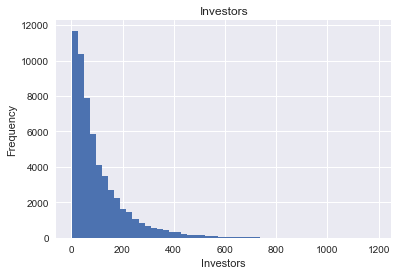

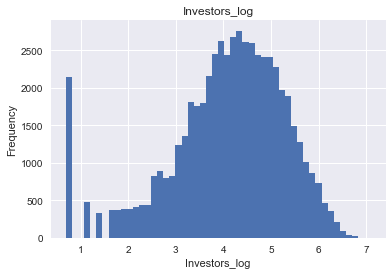

In [602]:
fig, ax = plt.subplots()
p_nf['Investors'].hist(bins=50)
ax.set_title('Investors')
ax.set_xlabel('Investors')
ax.set_ylabel('Frequency')

fig, ax = plt.subplots()
p_nf['Investors_log'].hist(bins=50)
ax.set_title('Investors_log')
ax.set_xlabel('Investors_log')
ax.set_ylabel('Frequency')

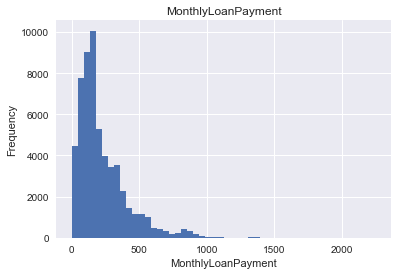

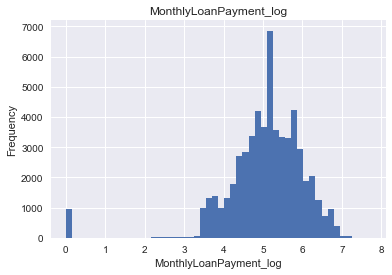

In [603]:
fig, ax = plt.subplots()
p_nf['MonthlyLoanPayment'].hist(bins=50)
ax.set_title('MonthlyLoanPayment')
ax.set_xlabel('MonthlyLoanPayment')
ax.set_ylabel('Frequency')

fig, ax = plt.subplots()
p_nf['MonthlyLoanPayment_log'].hist(bins=50)
ax.set_title('MonthlyLoanPayment_log')
ax.set_xlabel('MonthlyLoanPayment_log')
ax.set_ylabel('Frequency')

## Dropping the original columns (untransformed variables)

In [604]:
to_drop=['LP_CustomerPayments','LP_CustomerPrincipalPayments','LoanOriginalAmount',
        'MonthlyLoanPayment','Investors']

In [605]:
p_nf.drop(to_drop,inplace=True, axis=1)

In [606]:
p_nf[p_nf.isnull()] = 0

In [607]:
y1=(p_c['LoanStatus'])

In [608]:
y1.value_counts()

1    38074
0    19287
Name: LoanStatus, dtype: int64

In [609]:
p_c.drop(['LoanStatus'], inplace=True,axis=1)

In [610]:
p_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57361 entries, 0 to 113935
Data columns (total 10 columns):
CreditGrade                57361 non-null object
BorrowerState              57361 non-null object
Occupation                 57361 non-null object
EmploymentStatus           57361 non-null object
IsBorrowerHomeowner        57361 non-null bool
CurrentlyInGroup           57361 non-null bool
FirstRecordedCreditLine    57361 non-null object
IncomeRange                57361 non-null object
IncomeVerifiable           57361 non-null bool
LoanOriginationQuarter     57361 non-null object
dtypes: bool(3), object(7)
memory usage: 3.7+ MB


### FEATURE ENGINEERING, CATEGORICAL DATA

### For simplicity, replacing the 'Not employed' target variable type to 0

In [611]:
p_c.IncomeRange.replace('Not employed','$0', inplace=True)

In [612]:
p_c['IncomeRange'].value_counts()

$25,000-49,999    17081
$50,000-74,999    13435
Not displayed      7741
$75,000-99,999     6777
$100,000+          6421
$1-24,999          4738
$0                 1168
Name: IncomeRange, dtype: int64

### Mapping the ordinal data type 

In [613]:
income_range_map={'Not displayed' :0,'$0':1,'$1-24,999' :2,'$25,000-49,999':3,
                 '$50,000-74,999':4,'$75,000-99,999':5,'$100,000+':6}
p_c['Income_Range_Label']=p_c.IncomeRange.map(income_range_map)


In [614]:
p_c['Income_Range_Label'].value_counts()

3    17081
4    13435
0     7741
5     6777
6     6421
2     4738
1     1168
Name: Income_Range_Label, dtype: int64

In [615]:
Income_Range_dummy=pd.get_dummies(p_c.Income_Range_Label, drop_first=True)

In [616]:
Income_Range_dummy.head()

,1,2,3,4,5,6
0,0,0,1,0,0,0
2,0,0,0,0,0,0
11,0,1,0,0,0,0
12,0,0,1,0,0,0
15,0,0,0,1,0,0


In [617]:
dummy=p_c[['CreditGrade','EmploymentStatus','BorrowerState','Occupation','LoanOriginationQuarter']]
dummies=pd.get_dummies(dummy, drop_first=True)
dummies.head()

,CreditGrade_AA,CreditGrade_B,CreditGrade_C,CreditGrade_D,CreditGrade_E,CreditGrade_HR,CreditGrade_NC,CreditGrade_Unknown,EmploymentStatus_Full-time,EmploymentStatus_Not available,EmploymentStatus_Not employed,EmploymentStatus_Other,EmploymentStatus_Part-time,EmploymentStatus_Retired,EmploymentStatus_Self-employed,EmploymentStatus_Unknown,BorrowerState_AL,BorrowerState_AR,BorrowerState_AZ,BorrowerState_CA,BorrowerState_CO,BorrowerState_CT,BorrowerState_DC,BorrowerState_DE,BorrowerState_FL,BorrowerState_GA,BorrowerState_HI,BorrowerState_IA,BorrowerState_ID,BorrowerState_IL,BorrowerState_IN,BorrowerState_KS,BorrowerState_KY,BorrowerState_LA,BorrowerState_MA,BorrowerState_MD,BorrowerState_ME,BorrowerState_MI,BorrowerState_MN,BorrowerState_MO,...,Occupation_Teacher's Aide,Occupation_Tradesman - Carpenter,Occupation_Tradesman - Electrician,Occupation_Tradesman - Mechanic,Occupation_Tradesman - Plumber,Occupation_Truck Driver,Occupation_Unknown,Occupation_Waiter/Waitress,LoanOriginationQuarter_Q1 2007,LoanOriginationQuarter_Q1 2008,LoanOriginationQuarter_Q1 2010,LoanOriginationQuarter_Q1 2011,LoanOriginationQuarter_Q1 2012,LoanOriginationQuarter_Q1 2013,LoanOriginationQuarter_Q1 2014,LoanOriginationQuarter_Q2 2006,LoanOriginationQuarter_Q2 2007,LoanOriginationQuarter_Q2 2008,LoanOriginationQuarter_Q2 2009,LoanOriginationQuarter_Q2 2010,LoanOriginationQuarter_Q2 2011,LoanOriginationQuarter_Q2 2012,LoanOriginationQuarter_Q2 2013,LoanOriginationQuarter_Q3 2006,LoanOriginationQuarter_Q3 2007,LoanOriginationQuarter_Q3 2008,LoanOriginationQuarter_Q3 2009,LoanOriginationQuarter_Q3 2010,LoanOriginationQuarter_Q3 2011,LoanOriginationQuarter_Q3 2012,LoanOriginationQuarter_Q3 2013,LoanOriginationQuarter_Q4 2005,LoanOriginationQuarter_Q4 2006,LoanOriginationQuarter_Q4 2007,LoanOriginationQuarter_Q4 2008,LoanOriginationQuarter_Q4 2009,LoanOriginationQuarter_Q4 2010,LoanOriginationQuarter_Q4 2011,LoanOriginationQuarter_Q4 2012,LoanOriginationQuarter_Q4 2013
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [618]:
from datetime import timedelta
import datetime
p_c['FirstRecordedCreditLine'].replace('unknown',0,inplace=True)
p_c['FirstRecordedCreditLine'].replace('Unknown',0,inplace=True)
p_c['FirstRecordedCreditLine']=pd.to_datetime(p_c.FirstRecordedCreditLine)
p_c['FirstRecordedCreditLine']=p_c.FirstRecordedCreditLine.apply(lambda date: date.strftime('%m-%d-%Y'))

In [619]:
index=p_c.index

In [620]:
## FEATURE HASHING
from sklearn.feature_extraction import FeatureHasher
fh1=FeatureHasher(n_features=150, input_type='string')

#hash1
hash_1=fh1.fit_transform(p_c['FirstRecordedCreditLine'])
hash_1=hash_1.toarray()
hash_1=pd.DataFrame(hash_1, index=index)

In [621]:
hash_1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [622]:
categorical_loan=pd.concat([hash_1,Income_Range_dummy,dummies],axis=1)

In [623]:
categorical_loan.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,Occupation_Teacher's Aide,Occupation_Tradesman - Carpenter,Occupation_Tradesman - Electrician,Occupation_Tradesman - Mechanic,Occupation_Tradesman - Plumber,Occupation_Truck Driver,Occupation_Unknown,Occupation_Waiter/Waitress,LoanOriginationQuarter_Q1 2007,LoanOriginationQuarter_Q1 2008,LoanOriginationQuarter_Q1 2010,LoanOriginationQuarter_Q1 2011,LoanOriginationQuarter_Q1 2012,LoanOriginationQuarter_Q1 2013,LoanOriginationQuarter_Q1 2014,LoanOriginationQuarter_Q2 2006,LoanOriginationQuarter_Q2 2007,LoanOriginationQuarter_Q2 2008,LoanOriginationQuarter_Q2 2009,LoanOriginationQuarter_Q2 2010,LoanOriginationQuarter_Q2 2011,LoanOriginationQuarter_Q2 2012,LoanOriginationQuarter_Q2 2013,LoanOriginationQuarter_Q3 2006,LoanOriginationQuarter_Q3 2007,LoanOriginationQuarter_Q3 2008,LoanOriginationQuarter_Q3 2009,LoanOriginationQuarter_Q3 2010,LoanOriginationQuarter_Q3 2011,LoanOriginationQuarter_Q3 2012,LoanOriginationQuarter_Q3 2013,LoanOriginationQuarter_Q4 2005,LoanOriginationQuarter_Q4 2006,LoanOriginationQuarter_Q4 2007,LoanOriginationQuarter_Q4 2008,LoanOriginationQuarter_Q4 2009,LoanOriginationQuarter_Q4 2010,LoanOriginationQuarter_Q4 2011,LoanOriginationQuarter_Q4 2012,LoanOriginationQuarter_Q4 2013
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [624]:
y_f=pd.DataFrame(y1)

In [625]:
y_f.head(10)

,LoanStatus
0,1
2,1
11,1
12,0
15,0
17,0
21,1
23,0
26,1
27,1


In [626]:
final=pd.concat((p_nf,categorical_loan,y_f), axis=1, join='outer')

In [627]:
final.head()

,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LP_InterestandFees,LP_ServiceFees,...,Occupation_Tradesman - Carpenter,Occupation_Tradesman - Electrician,Occupation_Tradesman - Mechanic,Occupation_Tradesman - Plumber,Occupation_Truck Driver,Occupation_Unknown,Occupation_Waiter/Waitress,LoanOriginationQuarter_Q1 2007,LoanOriginationQuarter_Q1 2008,LoanOriginationQuarter_Q1 2010,LoanOriginationQuarter_Q1 2011,LoanOriginationQuarter_Q1 2012,LoanOriginationQuarter_Q1 2013,LoanOriginationQuarter_Q1 2014,LoanOriginationQuarter_Q2 2006,LoanOriginationQuarter_Q2 2007,LoanOriginationQuarter_Q2 2008,LoanOriginationQuarter_Q2 2009,LoanOriginationQuarter_Q2 2010,LoanOriginationQuarter_Q2 2011,LoanOriginationQuarter_Q2 2012,LoanOriginationQuarter_Q2 2013,LoanOriginationQuarter_Q3 2006,LoanOriginationQuarter_Q3 2007,LoanOriginationQuarter_Q3 2008,LoanOriginationQuarter_Q3 2009,LoanOriginationQuarter_Q3 2010,LoanOriginationQuarter_Q3 2011,LoanOriginationQuarter_Q3 2012,LoanOriginationQuarter_Q3 2013,LoanOriginationQuarter_Q4 2005,LoanOriginationQuarter_Q4 2006,LoanOriginationQuarter_Q4 2007,LoanOriginationQuarter_Q4 2008,LoanOriginationQuarter_Q4 2009,LoanOriginationQuarter_Q4 2010,LoanOriginationQuarter_Q4 2011,LoanOriginationQuarter_Q4 2012,LoanOriginationQuarter_Q4 2013,LoanStatus
0,36.0,0.16516,0.1580,0.1380,0.168661,0.080306,0.096068,4.072243,5.950067,0.0,2.000000,1.0,1.0,640.0,659.0,5.000000,4.000000,12.0,1.0,24.0,3.0,3.0,2.0,472.000000,4.0,0.0,0.000000,0.000000,0.000000,1500.000000,11.000000,0.810000,0.000000,0.17,1.0,3083.333333,0.0,78.0,1971.1400,-133.18,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,36.0,0.28269,0.2750,0.2400,0.168661,0.080306,0.096068,4.072243,5.950067,0.0,96.071582,0.0,1.0,480.0,499.0,10.317192,9.260164,3.0,0.0,0.0,0.0,1.0,1.0,984.507059,0.0,0.0,0.015094,17598.706751,0.561309,11210.225447,23.230034,0.885897,0.802327,0.06,1.0,2083.333333,0.0,86.0,1185.6300,-24.20,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11,36.0,0.15033,0.1325,0.1225,0.168661,0.080306,0.096068,4.072243,5.950067,0.0,19.000000,0.0,0.0,640.0,659.0,2.000000,2.000000,10.0,1.0,40.0,3.0,5.0,3.0,2224.000000,1.0,0.0,0.000000,1220.000000,0.320000,2580.000000,7.000000,0.400000,0.000000,0.27,1.0,1666.666667,0.0,77.0,11.6500,-0.88,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
12,36.0,0.17969,0.1435,0.1335,0.126400,0.052400,0.074000,5.000000,4.000000,1.0,1.000000,0.0,0.0,680.0,699.0,9.000000,7.000000,29.0,8.0,290.0,1.0,4.0,0.0,0.000000,0.0,0.0,0.000000,8624.000000,0.700000,3626.000000,20.000000,1.000000,0.000000,0.18,1.0,2416.666667,3.0,2.0,47.1774,-3.40,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,36.0,0.35797,0.3177,0.3077,0.289600,0.165000,0.124600,1.000000,5.000000,13.0,121.000000,1.0,0.0,700.0,719.0,10.000000,9.000000,18.0,5.0,300.0,0.0,1.0,0.0,0.000000,0.0,1.0,0.000000,9103.000000,0.970000,178.000000,17.000000,0.940000,0.000000,0.49,1.0,5500.000000,140.0,23.0,311.3800,-9.81,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [628]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57361 entries, 0 to 113935
Columns: 376 entries, Term to LoanStatus
dtypes: float64(203), int32(1), uint8(172)
memory usage: 98.9 MB


In [629]:
pd.set_option("display.max_columns", len(final.columns))
final.head(10)

,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,LP_CustomerPrincipalPayments_log,LP_CustomerPayments_log,LoanOriginalAmount_log,Investors_log,MonthlyLoanPayment_log,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,1,2,3,4,5,6,CreditGrade_AA,CreditGrade_B,CreditGrade_C,CreditGrade_D,CreditGrade_E,CreditGrade_HR,CreditGrade_NC,CreditGrade_Unknown,EmploymentStatus_Full-time,EmploymentStatus_Not available,EmploymentStatus_Not employed,EmploymentStatus_Other,EmploymentStatus_Part-time,EmploymentStatus_Retired,EmploymentStatus_Self-employed,EmploymentStatus_Unknown,BorrowerState_AL,BorrowerState_AR,BorrowerState_AZ,BorrowerState_CA,BorrowerState_CO,BorrowerState_CT,BorrowerState_DC,BorrowerState_DE,BorrowerState_FL,BorrowerState_GA,BorrowerState_HI,BorrowerState_IA,BorrowerState_ID,BorrowerState_IL,BorrowerState_IN,BorrowerState_KS,BorrowerState_KY,BorrowerState_LA,BorrowerState_MA,BorrowerState_MD,BorrowerState_ME,BorrowerState_MI,BorrowerState_MN,BorrowerState_MO,BorrowerState_MS,BorrowerState_MT,BorrowerState_NC,BorrowerState_ND,BorrowerState_NE,BorrowerState_NH,BorrowerState_NJ,BorrowerState_NM,BorrowerState_NV,BorrowerState_NY,BorrowerState_OH,BorrowerState_OK,BorrowerState_OR,BorrowerState_PA,BorrowerState_RI,BorrowerState_SC,BorrowerState_SD,BorrowerState_TN,BorrowerState_TX,BorrowerState_UT,BorrowerState_Unknown,BorrowerState_VA,BorrowerState_VT,BorrowerState_WA,BorrowerState_WI,BorrowerState_WV,BorrowerState_WY,Occupation_Administrative Assistant,Occupation_Analyst,Occupation_Architect,Occupation_Attorney,Occupation_Biologist,Occupation_Bus Driver,Occupation_Car Dealer,Occupation_Chemist,Occupation_Civil Service,Occupation_Clergy,Occupation_Clerical,Occupation_Computer Programmer,Occupation_Construction,Occupation_Dentist,Occupation_Doctor,Occupation_Engineer - Chemical,Occupation_Engineer - Electrical,Occupation_Engineer - Mechanical,Occupation_Executive,Occupation_Fireman,Occupation_Flight Attendant,Occupation_Food Service,Occupation_Food Service Management,Occupation_Homemaker,Occupation_Investor,Occupation_Judge,Occupation_Laborer,Occupation_Landscaping,Occupation_Medical Technician,Occupation_Military Enlisted,Occupation_Military Officer,Occupation_Nurse (LPN),Occupation_Nurse (RN),Occupation_Nurse's Aide,Occupation_Other,Occupation_Pharmacist,Occupation_Pilot - Private/Commercial,Occupation_Police Officer/Correction Officer,Occupation_Postal Service,Occupation_Principal,Occupation_Professional,Occupation_Professor,Occupation_Psychologist,Occupation_Realtor,Occupation_Religious,Occupation_Retail Management,Occupation_Sales - Commission,Occupation_Sales - Retail,Occupat

In [630]:
#Train test split
X=final.iloc[:,:-1]
y=final.iloc[:,-1]

In [631]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57361 entries, 0 to 113935
Columns: 375 entries, Term to LoanOriginationQuarter_Q4 2013
dtypes: float64(203), uint8(172)
memory usage: 98.7 MB


In [632]:
X.head()

,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,LP_CustomerPrincipalPayments_log,LP_CustomerPayments_log,LoanOriginalAmount_log,Investors_log,MonthlyLoanPayment_log,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,1,2,3,4,5,6,CreditGrade_AA,CreditGrade_B,CreditGrade_C,CreditGrade_D,CreditGrade_E,CreditGrade_HR,CreditGrade_NC,CreditGrade_Unknown,EmploymentStatus_Full-time,EmploymentStatus_Not available,EmploymentStatus_Not employed,EmploymentStatus_Other,EmploymentStatus_Part-time,EmploymentStatus_Retired,EmploymentStatus_Self-employed,EmploymentStatus_Unknown,BorrowerState_AL,BorrowerState_AR,BorrowerState_AZ,BorrowerState_CA,BorrowerState_CO,BorrowerState_CT,BorrowerState_DC,BorrowerState_DE,BorrowerState_FL,BorrowerState_GA,BorrowerState_HI,BorrowerState_IA,BorrowerState_ID,BorrowerState_IL,BorrowerState_IN,BorrowerState_KS,BorrowerState_KY,BorrowerState_LA,BorrowerState_MA,BorrowerState_MD,BorrowerState_ME,BorrowerState_MI,BorrowerState_MN,BorrowerState_MO,BorrowerState_MS,BorrowerState_MT,BorrowerState_NC,BorrowerState_ND,BorrowerState_NE,BorrowerState_NH,BorrowerState_NJ,BorrowerState_NM,BorrowerState_NV,BorrowerState_NY,BorrowerState_OH,BorrowerState_OK,BorrowerState_OR,BorrowerState_PA,BorrowerState_RI,BorrowerState_SC,BorrowerState_SD,BorrowerState_TN,BorrowerState_TX,BorrowerState_UT,BorrowerState_Unknown,BorrowerState_VA,BorrowerState_VT,BorrowerState_WA,BorrowerState_WI,BorrowerState_WV,BorrowerState_WY,Occupation_Administrative Assistant,Occupation_Analyst,Occupation_Architect,Occupation_Attorney,Occupation_Biologist,Occupation_Bus Driver,Occupation_Car Dealer,Occupation_Chemist,Occupation_Civil Service,Occupation_Clergy,Occupation_Clerical,Occupation_Computer Programmer,Occupation_Construction,Occupation_Dentist,Occupation_Doctor,Occupation_Engineer - Chemical,Occupation_Engineer - Electrical,Occupation_Engineer - Mechanical,Occupation_Executive,Occupation_Fireman,Occupation_Flight Attendant,Occupation_Food Service,Occupation_Food Service Management,Occupation_Homemaker,Occupation_Investor,Occupation_Judge,Occupation_Laborer,Occupation_Landscaping,Occupation_Medical Technician,Occupation_Military Enlisted,Occupation_Military Officer,Occupation_Nurse (LPN),Occupation_Nurse (RN),Occupation_Nurse's Aide,Occupation_Other,Occupation_Pharmacist,Occupation_Pilot - Private/Commercial,Occupation_Police Officer/Correction Officer,Occupation_Postal Service,Occupation_Principal,Occupation_Professional,Occupation_Professor,Occupation_Psychologist,Occupation_Realtor,Occupation_Religious,Occupation_Retail Management,Occupation_Sales - Commission,Occupation_Sales - Retail,Occupat

### Scaling the variables before training the model

In [633]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#Fit on training set only
scaler.fit(X)

#Apply transform on both training and test set
X = scaler.transform(X)

In [634]:
X=pd.DataFrame(X, index=final.index)

final_loan_normal = pd.concat((X,y), axis=1, join='outer')

In [635]:
final_loan_normal.to_csv('prosper_final_normal.csv')

In [636]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.20, random_state=50)

In [637]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45888 entries, 52775 to 27871
Columns: 375 entries, 0 to 374
dtypes: float64(375)
memory usage: 131.6 MB


In [638]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11473 entries, 1872 to 3095
Columns: 375 entries, 0 to 374
dtypes: float64(375)
memory usage: 32.9 MB


### CLASSIFIERS

### Model 1: SVM with L1(Binary)

In [639]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score, recall_score

f1_score_train = []
f1_score_test = []
recall_train = []
recall_test = []


chunksize = 5000

estimator = SGDClassifier(loss='hinge', penalty='l1', l1_ratio=1)
for i,chunk in enumerate(pd.read_csv('prosper_final_normal.csv', chunksize=chunksize)):
    X_chunk = chunk.iloc[:,1:-1]
    y_chunk = chunk.iloc[:,-1]
    estimator.partial_fit(X_chunk,y_chunk, classes=np.unique(y_test))
    
    y_pred_test = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train)
    
    # Since our focus is on default loan class, the parameter pos_label is set to 0
    f_te = f1_score(y_test,y_pred_test,pos_label=0)
    f_ta = f1_score(y_train,y_pred_train, pos_label=0)
    
    rc_test=recall_score(y_test,y_pred_test, pos_label=0)
    rc_train=recall_score(y_train,y_pred_train, pos_label=0)
       
    f1_score_train.append(f_ta)
    f1_score_test.append(f_te)
    
    recall_train.append(rc_train)
    recall_test.append(rc_test)
    


In [640]:
print('Average f1 score :  {0:0.2f}' .format(sum(f1_score_test)/len(f1_score_test)))

print('Average Recall score is : {0:0.2f}'.format(sum(recall_test)/len(recall_test)))

Average f1 score :  0.97
Average Recall score is : 0.96


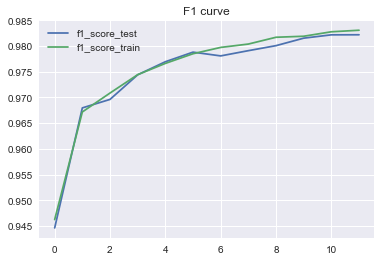

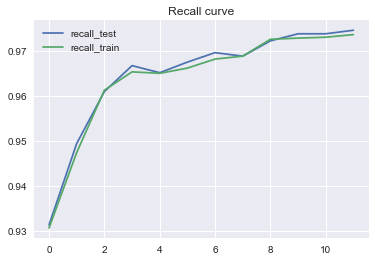

In [641]:
plt.plot(f1_score_test)
plt.plot(f1_score_train)
plt.legend(('f1_score_test','f1_score_train'))
plt.title('F1 curve')
plt.show()

plt.plot(recall_test)
plt.plot(recall_train)
plt.legend(('recall_test','recall_train'))
plt.title('Recall curve')
plt.show()

### Model 2:Logistic Regression with L1(Binary)

In [642]:
#Logistic Regression
from sklearn.metrics import roc_auc_score

auc_train = []
auc_test = []
chunksize = 5000

estimator = SGDClassifier(loss='log', penalty='l1', l1_ratio=1)
for i,chunk in enumerate(pd.read_csv('prosper_final_normal.csv', chunksize=chunksize)):
    X_chunk = chunk.iloc[:,1:-1]
    y_chunk = chunk.iloc[:,-1]
    estimator.partial_fit(X_chunk,y_chunk, classes=np.unique(y_test))
    
    y_pred_test = estimator.predict_proba(X_test)[:,1]
    y_pred_train = estimator.predict_proba(X_train)[:,1]
    
    auc_tr=roc_auc_score(y_train,y_pred_train,average='micro')
    auc_te=roc_auc_score(y_test,y_pred_test, average='micro')
    
    auc_train.append(auc_tr)
    auc_test.append(auc_te)
    
    

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [643]:
print('Average AUC Score : {0:0.2f}' .format(sum(auc_test)/len(auc_test)))

Average AUC Score : 0.99


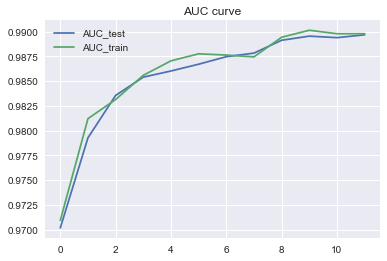

In [644]:
plt.plot(auc_train)
plt.plot(auc_test)
plt.legend(('AUC_test','AUC_train'))
plt.title('AUC curve')
plt.show()

### Model 3:SVM with L2(Binary)

In [645]:
f1_score_train = []
f1_score_test = []

recall_train = []
recall_test=[]

chunksize = 5000

estimator = SGDClassifier(loss='hinge', penalty='l2', l1_ratio=0)
for i,chunk in enumerate(pd.read_csv('prosper_final_normal.csv', chunksize=chunksize)):
    X_chunk = chunk.iloc[:,1:-1]
    y_chunk = chunk.iloc[:,-1]
    estimator.partial_fit(X_chunk,y_chunk, classes=np.unique(y_test))
    
    y_pred_test = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train)
    
    f_te = f1_score(y_test,y_pred_test, pos_label=0)
    f_ta = f1_score(y_train,y_pred_train, pos_label=0)
    
    rc_test = recall_score(y_test,y_pred_test, pos_label=0)
    rc_train = recall_score(y_train, y_pred_train,pos_label=0)
    
    f1_score_train.append(f_ta)
    f1_score_test.append(f_te)
    
    recall_train.append(rc_train)
    recall_test.append(rc_test)

In [646]:
print('Average f1 score :  {0:0.2f}' .format(sum(f1_score_test)/len(f1_score_test)))

print('Average Recall score is : {0:0.2f}'.format(sum(recall_test)/len(recall_test)))

Average f1 score :  0.96
Average Recall score is : 0.96


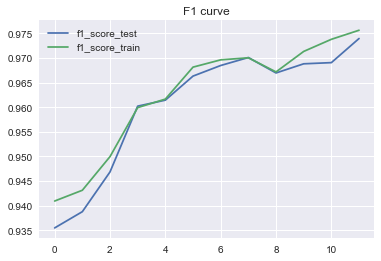

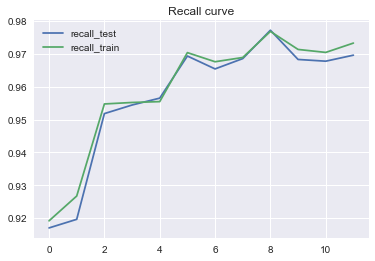

In [647]:
plt.plot(f1_score_test)
plt.plot(f1_score_train)
plt.legend(('f1_score_test','f1_score_train'))
plt.title('F1 curve')
plt.show()

plt.plot(recall_test)
plt.plot(recall_train)
plt.legend(('recall_test','recall_train'))
plt.title('Recall curve')
plt.show()

### Model 4:Logistic Regression with L2(Binary)

In [648]:
#Logistic Regression

auc_train = []
auc_test = []


chunksize = 5000

estimator = SGDClassifier(loss='log', penalty='l2', l1_ratio=0)
for i,chunk in enumerate(pd.read_csv('prosper_final_normal.csv', chunksize=chunksize)):
    X_chunk = chunk.iloc[:,1:-1]
    y_chunk = chunk.iloc[:,-1]
    estimator.partial_fit(X_chunk,y_chunk, classes=np.unique(y_test))
    
    y_pred_test = estimator.predict_proba(X_test)[:,1]
    y_pred_train = estimator.predict_proba(X_train)[:,1]
    
    auc_tr=roc_auc_score(y_train,y_pred_train,average='micro')
    auc_te=roc_auc_score(y_test,y_pred_test, average='micro')
    
    auc_train.append(auc_tr)
    auc_test.append(auc_te)
    

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [649]:
print('Average AUC Score : {0:0.2f}' .format(sum(auc_test)/len(auc_test)))

Average AUC Score : 0.99


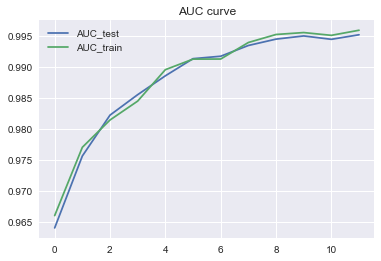

In [650]:
plt.plot(auc_train)
plt.plot(auc_test)
plt.legend(('AUC_test','AUC_train'))
plt.title('AUC curve')
plt.show()

### Model 5: Multi Layer Perceptron(Binary Classification)

In [651]:
from sklearn.neural_network import MLPClassifier

f1_score_train = []
f1_score_test = []

recall_train = []
recall_test = []

chunksize = 5000

# After tuning the parameter alpha, we get the best model for alpha = 1 and the hidden layer sizes of 2056

estimator = MLPClassifier(hidden_layer_sizes=(2056,),alpha=1)
for i,chunk in enumerate(pd.read_csv('prosper_final_normal.csv', chunksize=chunksize)):
    X_chunk = chunk.iloc[:,1:-1]
    y_chunk= chunk.iloc[:,-1]
    estimator.partial_fit(X_chunk,y_chunk,classes=np.unique(y_test))
    
    y_pred_test = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train)
    
    f_te = f1_score(y_test,y_pred_test,pos_label=0)
    f_ta = f1_score(y_train,y_pred_train,pos_label=0)
    
    rc_train=recall_score(y_train, y_pred_train, pos_label=0)
    rc_test=recall_score(y_test, y_pred_test, pos_label=0)
    
   
    f1_score_train.append(f_ta)
    f1_score_test.append(f_te)
    
    recall_train.append(rc_train)
    recall_test.append(rc_test)
    

In [652]:
print('Average f1 score :  {0:0.2f}' .format(sum(f1_score_test)/len(f1_score_test)))

print('Average Recall score is : {0:0.2f}'.format(sum(recall_test)/len(recall_test)))

Average f1 score :  0.96
Average Recall score is : 0.93


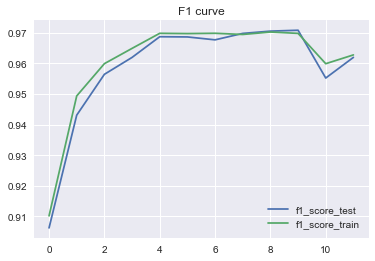

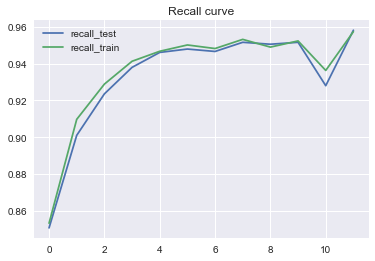

In [653]:
plt.plot(f1_score_test)
plt.plot(f1_score_train)
plt.legend(('f1_score_test','f1_score_train'))
plt.title('F1 curve')
plt.show()

plt.plot(recall_test)
plt.plot(recall_train)
plt.legend(('recall_test','recall_train'))
plt.title('Recall curve')
plt.show()

### Model 6: BernoulliNB(Binary Classification)

In [654]:
from sklearn.naive_bayes import BernoulliNB

auc_train=[]
auc_test=[]

chunksize = 5000

estimator = BernoulliNB()
for i,chunk in enumerate(pd.read_csv('prosper_final_normal.csv', chunksize=chunksize)):
    X_chunk = chunk.iloc[:,1:-1]
    y_chunk= chunk.iloc[:,-1]
    estimator.partial_fit(X_chunk,y_chunk,classes=np.unique(y_test))
    
    y_pred_test = estimator.predict_proba(X_test)[:,1]
    y_pred_train = estimator.predict_proba(X_train)[:,1]
    
    auc_tr=roc_auc_score(y_train,y_pred_train,average='micro')
    auc_te=roc_auc_score(y_test,y_pred_test, average='micro')
    
    auc_train.append(auc_tr)
    auc_test.append(auc_te)

In [655]:
print('Average AUC Score : {0:0.2f}' .format(sum(auc_test)/len(auc_test)))

Average AUC Score : 0.97


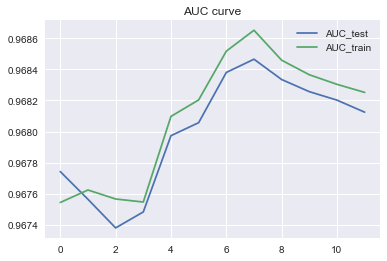

In [656]:
plt.plot(auc_train)
plt.plot(auc_test)
plt.legend(('AUC_test','AUC_train'))
plt.title('AUC curve')
plt.show()

### Model 7: Random Forest(Binary Classification)

In [657]:
from sklearn.ensemble import RandomForestClassifier

f1_score_train = []
f1_score_test = []

recall_train = []
recall_test = []

chunksize = 5000

estimator = RandomForestClassifier(n_estimators = 50, warm_start=True)
for i,chunk in enumerate(pd.read_csv('prosper_final_normal.csv', chunksize=chunksize)):
    X_chunk = chunk.iloc[:,1:-1]
    y_chunk= chunk.iloc[:,-1]
    
    estimator.fit(X_chunk,y_chunk)
    estimator.set_params(n_estimators = 100+50*i)
    
    y_pred_test = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train)
    
    f_te = f1_score(y_test,y_pred_test, pos_label=0)
    f_ta = f1_score(y_train,y_pred_train,pos_label=0)
    
    rc_train=recall_score(y_train,y_pred_train,pos_label=0)
    rc_test=recall_score(y_test,y_pred_test, pos_label=0)
    
    f1_score_train.append(f_ta)
    f1_score_test.append(f_te)
    
    recall_train.append(rc_train)
    recall_test.append(rc_test)

In [658]:
print('Average f1 score :  {0:0.2f}' .format(sum(f1_score_test)/len(f1_score_test)))

print('Average Recall score is : {0:0.2f}'.format(sum(recall_test)/len(recall_test)))

Average f1 score :  0.99
Average Recall score is : 0.99


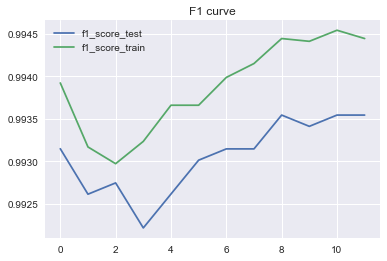

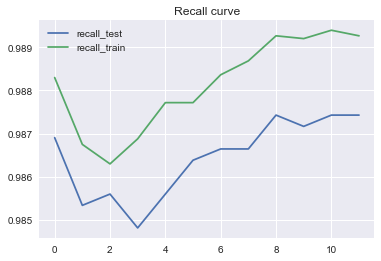

In [659]:
plt.plot(f1_score_test)
plt.plot(f1_score_train)
plt.legend(('f1_score_test','f1_score_train'))
plt.title('F1 curve')
plt.show()

plt.plot(recall_test)
plt.plot(recall_train)
plt.legend(('recall_test','recall_train'))
plt.title('Recall curve')
plt.show()

### MULTI - CLASS CLASSIFICATION

In [660]:
y_new=(pl['LoanStatus'])

In [661]:
y_new=y_new[y_new!='Current']

In [662]:
y_new.value_counts()

Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [663]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y_new)
encoder_Y = encoder.transform(y_new)

In [664]:
unique, counts = np.unique(encoder_Y, return_counts=True)

print (np.asarray((unique, counts)))

[[    0     1     2     3     4     5     6     7     8     9    10]
 [    5 11992 38074  5018   205   806   265   363   313   304    16]]


In [665]:
y_m = pd.DataFrame(encoder_Y, index = final.index)

In [666]:
y_m.head()

,0
0,2
2,2
11,2
12,5
15,3


In [667]:
final_loan_m_normal = pd.concat((X,y_m), axis=1, join='outer')

In [668]:
final_loan_m_normal.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,0
0,-0.156766,-0.667834,-0.539023,-0.665467,-0.088074,-0.176553,-0.213943,0.166661,-0.067431,-0.708405,-1.026479,1.060416,1.954857,-0.405072,-0.405072,-0.900947,-0.964045,-0.944028,-1.128100,-0.679008,0.321213,-0.502586,0.436409,-0.093235,-0.053949,-0.423233,-0.133136,-0.506273,-1.645684,-0.456314,-0.951454,-0.318406,-0.775625,-0.169775,0.292717,-0.352011,-0.488455,0.890110,0.685512,-1.334301,0.174628,-0.432037,-0.425334,-0.129079,0.080959,-0.193698,-0.138191,-0.078051,0.906351,0.904298,0.885549,1.197214,0.723608,-0.581852,0.0,0.0,0.0,0.0,0.0,0.0,-2.179163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.202999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.539591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.547179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.714462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.530327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.531039,0.0,0.0,0.0,0.0,0.0,-0.575210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.939329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.144172,-0.300061,1.535635,-0.553042,-0.366026,-0.355036,-0.255265,-0.287846,3.025589,-0.314168,-0.24663,-0.255226,-0.04964,-0.990543,-0.880155,-0.320623,-0.101682,-0.127954,-0.137476,-0.11139,4.220551,-0.20229,-0.125181,-0.072265,-0.131634,-0.388076,7.312584,-0.10359,-0.057037,-0.043833,-0.244555,-0.230464,-0.053219,-0.057037,-0.077447,-0.240445,-0.132454,-0.090599,-0.083376,-0.081121,-0.132659,-0.156131,-0.041999,-0.182199,-0.145864,-0.165319,-0.073953,-0.056728,-0.167477,-0.030122,-0.06877,-0.064548,-0.144549,-0.064412,-0.081012,-0.221429,-0.184939,-0.091669,-0.136154,-0.143856,-0.053054,-0.087213,-0.034955,-0.115722,-0.229582,-0.101857,-0.326148,-0.16353,-0.037605,-0.175239,-0.121318,-0.057343,-0.033159,-0.190905,-0.18225,-0.046356,-0.088222,-0.034451,-0.049108,-0.03875,-0.035697,-0.109612,-0.039198,-0.179733,-0.216621,-0.120427,-0.020881,-0.061908,-0.044428,-0.099382,-0.107723,-0.183523,-0.064548,-0.034197,-0.099292,-0.096571,-0.03875,-0.04179,-0.007232,-0.115489,-0.04323,-0.095461,-0.121244,-0.060181,-0.057343,-0.123664,-0.061766,1.703714,-0.041369,-0.042413,-0.111069,-0.071654,-0.04482,-0.366302,-0.065628,-0.03098,-0.081879,-0.035451,-0.147907,-0.184485,-0.163474,-0.057649,-0.14895,-0.077901,-0.024709,-0.060617,-0.042206,-0.054036,-0.033682,-0.020881,-0.016173,-0.176346,-0.051545,-0.032628,-0.061481,-0.079249,-0.029537,-0.109204,-0.20364,-0.066955,-0.238164,-0.23796,-0.148828,-0.168957,-0.20992,-0.133

In [669]:
final_loan_m_normal.to_csv('prosper_final_m_normal.csv')

In [670]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y_m, test_size=0.20, random_state=50)

### Model 8: SVM WITH L1(Multi Classification)

In [671]:
from sklearn.metrics import matthews_corrcoef

f1_score_train = []
f1_score_test = []

chunksize = 5000

estimator = SGDClassifier(loss='hinge', alpha=0.0001,penalty='l1', l1_ratio=1)
for i,chunk in enumerate(pd.read_csv('prosper_final_m_normal.csv', chunksize=chunksize)):
    X_chunk = chunk.iloc[:,1:-1]
    y_chunk = chunk.iloc[:,-1]
    estimator.partial_fit(X_chunk,y_chunk, classes=np.unique(y_test))
    
    y_pred_test = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train)
    
    f_te = f1_score(y_test,y_pred_test,average='micro')
    f_ta = f1_score(y_train,y_pred_train,average='micro')
    
    f1_score_train.append(f_ta)
    f1_score_test.append(f_te)

In [672]:
print('Average f1 score :  {0:0.2f}' .format(sum(f1_score_test)/len(f1_score_test)))


Average f1 score :  0.93


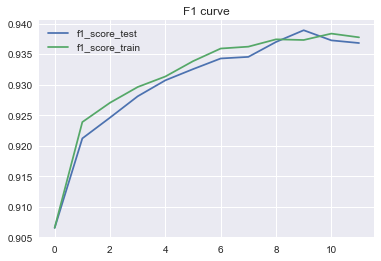

In [673]:
plt.plot(f1_score_test)
plt.plot(f1_score_train)
plt.legend(('f1_score_test','f1_score_train'))
plt.title('F1 curve')
plt.show()

### Model 9:  SVM with L2(Multi Classification)

In [674]:
from sklearn.metrics import matthews_corrcoef
f1_score_train = []
f1_score_test = []

chunksize = 5000

estimator = SGDClassifier(loss='hinge', alpha=0.0001,penalty='l2', l1_ratio=0)
for i,chunk in enumerate(pd.read_csv('prosper_final_m_normal.csv', chunksize=chunksize)):
    X_chunk = chunk.iloc[:,1:-1]
    y_chunk = chunk.iloc[:,-1]
    estimator.partial_fit(X_chunk,y_chunk, classes=np.unique(y_test))
    
    y_pred_test = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train)
    
    f_te = f1_score(y_test,y_pred_test,average='micro')
    f_ta = f1_score(y_train,y_pred_train,average='micro')

    f1_score_train.append(f_ta)
    f1_score_test.append(f_te)
    

In [675]:
print('Average f1 score :  {0:0.2f}' .format(sum(f1_score_test)/len(f1_score_test)))


Average f1 score :  0.91


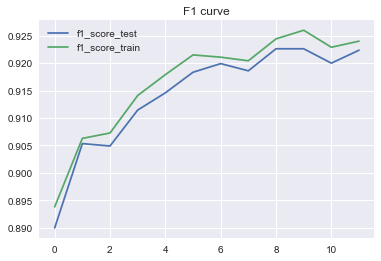

In [676]:
plt.plot(f1_score_test)
plt.plot(f1_score_train)
plt.legend(('f1_score_test','f1_score_train'))
plt.title('F1 curve')
plt.show()

### Model 10: Multi Layer Perceptron(Multi Classification)

In [677]:
from sklearn.neural_network import MLPClassifier

f1_score_train = []
f1_score_test = []


chunksize = 5000

estimator = MLPClassifier(hidden_layer_sizes=(2056,),alpha=0.1)
for i,chunk in enumerate(pd.read_csv('prosper_final_m_normal.csv', chunksize=chunksize)):
    X_chunk = chunk.iloc[:,1:-1]
    y_chunk= chunk.iloc[:,-1]
    estimator.partial_fit(X_chunk,y_chunk,np.unique(y_test))
    
    y_pred_test = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train)
    
    f_te = f1_score(y_test,y_pred_test,average='micro')
    f_ta = f1_score(y_train,y_pred_train,average='micro')
    
    f1_score_train.append(f_ta)
    f1_score_test.append(f_te)
    

In [678]:
print('Average f1 score :  {0:0.2f}' .format(sum(f1_score_test)/len(f1_score_test)))


Average f1 score :  0.93


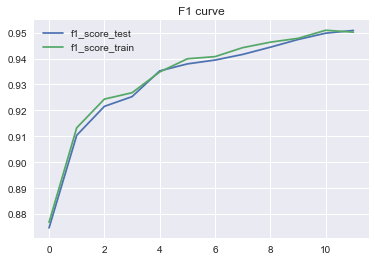

In [679]:
plt.plot(f1_score_test)
plt.plot(f1_score_train)
plt.legend(('f1_score_test','f1_score_train'))
plt.title('F1 curve')
plt.show()


## PRINCIPAL COMPONENT ANALYSIS(PCA)

In [680]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [681]:
pca.n_components_

186

In [682]:
X = pca.transform(X)

X_f=pd.DataFrame(X, index=final.index)

In [683]:
final_loan = pd.concat((X_f,y), axis=1, join='outer')

In [684]:
final_loan.to_csv('prosper_final.csv')

In [685]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_f,y, test_size=0.20, random_state=50)

In [686]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45888 entries, 52775 to 27871
Columns: 186 entries, 0 to 185
dtypes: float64(186)
memory usage: 65.5 MB


In [687]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11473 entries, 1872 to 3095
Columns: 186 entries, 0 to 185
dtypes: float64(186)
memory usage: 16.4 MB


### BINARY CLASS CLASSIFICATION

### Model 11: SVM with L1(PCA/Binary Classification)

In [688]:

f1_score_train = []
f1_score_test = []

recall_train = []
recall_test = []

chunksize = 5000

estimator = SGDClassifier(loss='hinge', penalty='l1', l1_ratio=1)
for i,chunk in enumerate(pd.read_csv('prosper_final.csv', chunksize=chunksize)):
    X_chunk = chunk.iloc[:,1:-1]
    y_chunk = chunk.iloc[:,-1]
    estimator.partial_fit(X_chunk,y_chunk, classes=np.unique(y_test))
    
    y_pred_test = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train)
    
    f_te = f1_score(y_test,y_pred_test,pos_label=0)
    f_ta = f1_score(y_train,y_pred_train, pos_label=0)
    
    rc_test=recall_score(y_test,y_pred_test, pos_label=0)
    rc_train=recall_score(y_train,y_pred_train, pos_label=0)
       
    f1_score_train.append(f_ta)
    f1_score_test.append(f_te)
    
    recall_train.append(rc_train)
    recall_test.append(rc_test)
    
    

In [689]:
print('Average f1 score :  {0:0.2f}' .format(sum(f1_score_test)/len(f1_score_test)))

print('Average Recall score is : {0:0.2f}'.format(sum(recall_test)/len(recall_test)))

Average f1 score :  0.96
Average Recall score is : 0.95


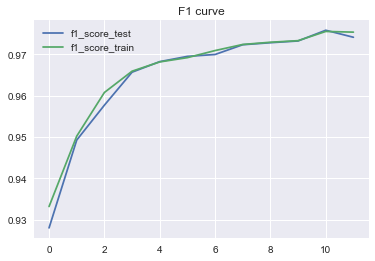

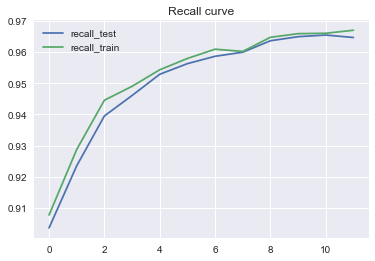

In [690]:
plt.plot(f1_score_test)
plt.plot(f1_score_train)
plt.legend(('f1_score_test','f1_score_train'))
plt.title('F1 curve')
plt.show()

plt.plot(recall_test)
plt.plot(recall_train)
plt.legend(('recall_test','recall_train'))
plt.title('Recall curve')
plt.show()

### Model 12: Logistic Regression with L1(PCA/Binary Classification)

In [691]:
#Logistic Regression

auc_train = []
auc_test = []

chunksize = 5000

estimator = SGDClassifier(loss='log', penalty='l1', l1_ratio=1)
for i,chunk in enumerate(pd.read_csv('prosper_final.csv', chunksize=chunksize)):
    X_chunk = chunk.iloc[:,1:-1]
    y_chunk = chunk.iloc[:,-1]
    estimator.partial_fit(X_chunk,y_chunk, classes=np.unique(y_test))
    
    y_pred_test = estimator.predict_proba(X_test)[:,1]
    y_pred_train = estimator.predict_proba(X_train)[:,1]
    
    auc_tr=roc_auc_score(y_train,y_pred_train,average='micro')
    auc_te=roc_auc_score(y_test,y_pred_test, average='micro')
    
    auc_train.append(auc_tr)
    auc_test.append(auc_te)
    

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [692]:
print('Average AUC Score : {0:0.2f}' .format(sum(auc_test)/len(auc_test)))

Average AUC Score : 0.98


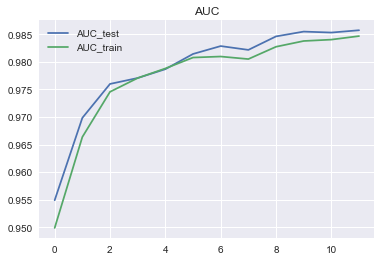

In [693]:
plt.plot(auc_train)
plt.plot(auc_test)
plt.legend(('AUC_test','AUC_train'))
plt.title('AUC')
plt.show()

### Model 13:SVM with L2(PCA/Binary Classification)

In [694]:
f1_score_train = []
f1_score_test = []

recall_train = []
recall_test = []

chunksize = 5000

estimator = SGDClassifier(loss='hinge', penalty='l2', l1_ratio=0)
for i,chunk in enumerate(pd.read_csv('prosper_final.csv', chunksize=chunksize)):
    X_chunk = chunk.iloc[:,1:-1]
    y_chunk = chunk.iloc[:,-1]
    estimator.partial_fit(X_chunk,y_chunk, classes=np.unique(y_test))
    
    y_pred_test = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train)
    
    f_te = f1_score(y_test,y_pred_test, pos_label=0)
    f_ta = f1_score(y_train,y_pred_train, pos_label=0)
    
    rc_test = recall_score(y_test,y_pred_test, pos_label=0)
    rc_train=recall_score(y_train, y_pred_train,pos_label=0)
    
    f1_score_train.append(f_ta)
    f1_score_test.append(f_te)
    
    recall_train.append(rc_train)
    recall_test.append(rc_test)
    

In [695]:
print('Average f1 score :  {0:0.2f}' .format(sum(f1_score_test)/len(f1_score_test)))

print('Average Recall score is : {0:0.2f}'.format(sum(recall_test)/len(recall_test)))

Average f1 score :  0.94
Average Recall score is : 0.93


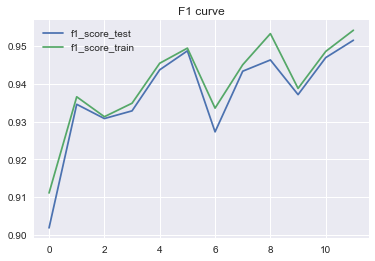

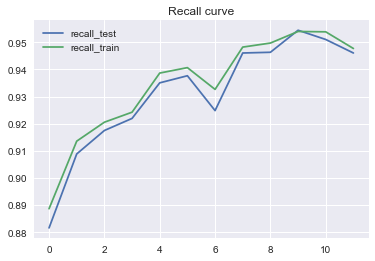

In [696]:
plt.plot(f1_score_test)
plt.plot(f1_score_train)
plt.legend(('f1_score_test','f1_score_train'))
plt.title('F1 curve')
plt.show()

plt.plot(recall_test)
plt.plot(recall_train)
plt.legend(('recall_test','recall_train'))
plt.title('Recall curve')
plt.show()

### Model 14:Logistic Regression with L2 (PCA/Binary Classification)

In [697]:
auc_train = []
auc_test = []

chunksize = 5000

estimator = SGDClassifier(loss='log', penalty='l2', l1_ratio=0)
for i,chunk in enumerate(pd.read_csv('prosper_final.csv', chunksize=chunksize)):
    X_chunk = chunk.iloc[:,1:-1]
    y_chunk = chunk.iloc[:,-1]
    estimator.partial_fit(X_chunk,y_chunk, classes=np.unique(y_test))
    
    y_pred_test = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train)
    
    auc_tr=roc_auc_score(y_train,y_pred_train,average='micro')
    auc_te=roc_auc_score(y_test,y_pred_test, average='micro')
    
    auc_train.append(auc_tr)
    auc_test.append(auc_te)

In [698]:
print('Average AUC Score : {0:0.2f}' .format(sum(auc_test)/len(auc_test)))

Average AUC Score : 0.95


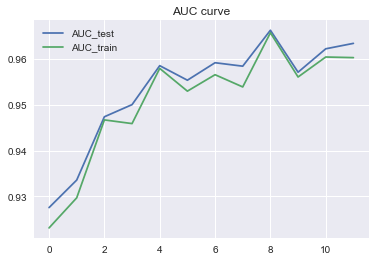

In [699]:
plt.plot(auc_train)
plt.plot(auc_test)
plt.legend(('AUC_test','AUC_train'))
plt.title('AUC curve')
plt.show()

### Model 15:Multi Layer Perceptron (PCA/Binary Classification)

In [700]:
from sklearn.neural_network import MLPClassifier

f1_score_train = []
f1_score_test = []

recall_test = []
recall_train = []

chunksize = 5000

estimator = MLPClassifier(hidden_layer_sizes=(2056,),alpha=0.1)
for i,chunk in enumerate(pd.read_csv('prosper_final.csv', chunksize=chunksize)):
    X_chunk = chunk.iloc[:,1:-1]
    y_chunk= chunk.iloc[:,-1]
    estimator.partial_fit(X_chunk,y_chunk,classes=np.unique(y_test))
    
    y_pred_test = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train)
    
    f_te = f1_score(y_test,y_pred_test)
    f_ta = f1_score(y_train,y_pred_train)
    
    rc_train=recall_score(y_train, y_pred_train, pos_label=0)
    rc_test=recall_score(y_test, y_pred_test, pos_label=0)
    
    f1_score_train.append(f_ta)
    f1_score_test.append(f_te)
    
    recall_train.append(rc_train)
    recall_test.append(rc_test)

In [701]:
print('Average f1 score :  {0:0.2f}' .format(sum(f1_score_test)/len(f1_score_test)))

print('Average Recall score is : {0:0.2f}'.format(sum(recall_test)/len(recall_test)))

Average f1 score :  0.97
Average Recall score is : 0.90


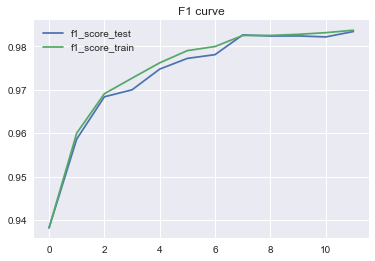

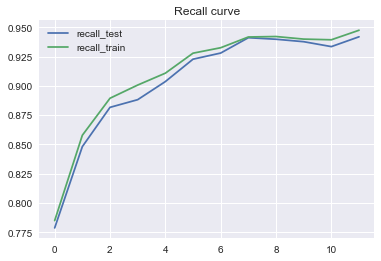

In [702]:
plt.plot(f1_score_test)
plt.plot(f1_score_train)
plt.legend(('f1_score_test','f1_score_train'))
plt.title('F1 curve')
plt.show()

plt.plot(recall_test)
plt.plot(recall_train)
plt.legend(('recall_test','recall_train'))
plt.title('Recall curve')
plt.show()

### Model 16:BernoulliNB (PCA/Binary Classification)

In [703]:
from sklearn.naive_bayes import BernoulliNB

auc_train = []
auc_test = []

chunksize = 5000

estimator = BernoulliNB()
for i,chunk in enumerate(pd.read_csv('prosper_final.csv', chunksize=chunksize)):
    X_chunk = chunk.iloc[:,1:-1]
    y_chunk= chunk.iloc[:,-1]
    estimator.partial_fit(X_chunk,y_chunk,classes=np.unique(y_test))
    
    y_pred_test = estimator.predict_proba(X_test)[:,1]
    y_pred_train = estimator.predict_proba(X_train)[:,1]
    
    auc_tr=roc_auc_score(y_train,y_pred_train,average='micro')
    auc_te=roc_auc_score(y_test,y_pred_test, average='micro')
    
    auc_train.append(auc_tr)
    auc_test.append(auc_te)

In [704]:
print('Average AUC Score : {0:0.2f}' .format(sum(auc_test)/len(auc_test)))

Average AUC Score : 0.90


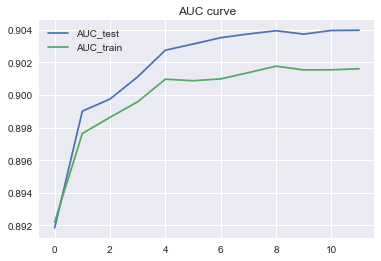

In [705]:
plt.plot(auc_train)
plt.plot(auc_test)
plt.legend(('AUC_test','AUC_train'))
plt.title('AUC curve')
plt.show()

### Model 17:Random Forest (PCA/Binary Classification)

In [706]:
from sklearn.ensemble import RandomForestClassifier

f1_score_train = []
f1_score_test = []

recall_train = []
recall_test = []

chunksize = 5000

estimator = RandomForestClassifier(n_estimators = 50, warm_start=True)
for i,chunk in enumerate(pd.read_csv('prosper_final.csv', chunksize=chunksize)):
    X_chunk = chunk.iloc[:,1:-1]
    y_chunk= chunk.iloc[:,-1]
    
    estimator.fit(X_chunk,y_chunk)
    estimator.set_params(n_estimators = 100+50*i)
    
    y_pred_test = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train)
    
    f_te = f1_score(y_test,y_pred_test, pos_label=0)
    f_ta = f1_score(y_train,y_pred_train,pos_label=0)
    
    rc_train=recall_score(y_train,y_pred_train,pos_label=0)
    rc_test=recall_score(y_test,y_pred_test, pos_label=0)
    
    f1_score_train.append(f_ta)
    f1_score_test.append(f_te)
    
    recall_train.append(rc_train)
    recall_test.append(rc_test)

In [707]:
print('Average f1 score :  {0:0.2f}' .format(sum(f1_score_test)/len(f1_score_test)))

print('Average Recall score is : {0:0.2f}'.format(sum(recall_test)/len(recall_test)))

Average f1 score :  0.82
Average Recall score is : 0.70


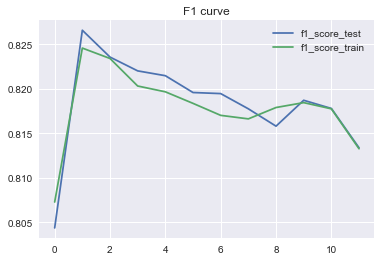

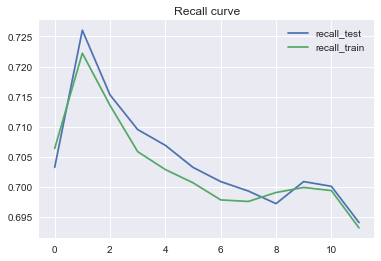

In [708]:
plt.plot(f1_score_test)
plt.plot(f1_score_train)
plt.legend(('f1_score_test','f1_score_train'))
plt.title('F1 curve')
plt.show()

plt.plot(recall_test)
plt.plot(recall_train)
plt.legend(('recall_test','recall_train'))
plt.title('Recall curve')
plt.show()

### MULTI - CLASS CLASSIFICATION

In [709]:
y_new=(pl['LoanStatus'])

In [710]:
y_new=y_new[y_new!='Current']

In [711]:
y_new.value_counts()


Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [712]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y_new)
encoder_Y = encoder.transform(y_new)

In [713]:
unique, counts = np.unique(encoder_Y, return_counts=True)

print (np.asarray((unique, counts)))

[[    0     1     2     3     4     5     6     7     8     9    10]
 [    5 11992 38074  5018   205   806   265   363   313   304    16]]


In [714]:
y_m = pd.DataFrame(encoder_Y, index = final.index)

In [715]:
y_m.head()

,0
0,2
2,2
11,2
12,5
15,3


In [716]:
final_loan_m = pd.concat((X_f,y_m), axis=1, join='outer')

In [717]:
final_loan_m.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,0
0,0.470168,2.097374,-1.681590,3.217867,-1.205997,0.638174,0.819883,0.331106,1.525634,-0.702547,-0.545952,-0.573671,-0.744807,-0.922794,-0.230772,-1.100957,-0.779266,1.241283,-0.616218,3.037929,-1.227265,0.338751,-0.034684,-0.893574,-0.490936,-0.602462,1.168783,-0.384161,-0.277183,0.331319,1.005747,-0.085753,-0.442518,-2.673530,-0.603193,-0.237312,0.282522,-0.554676,-0.203453,1.194544,0.076899,1.708998,0.703957,0.512667,1.398440,-0.126405,1.022916,-0.043156,0.834263,0.216721,-1.474902,0.686735,-0.079007,-1.638293,-0.224437,-0.253507,-1.223124,-0.583942,0.180578,-0.785854,0.820022,0.476959,0.153746,1.536752,0.529711,1.670006,0.832245,-0.637647,-0.559227,1.166738,-0.029330,1.027227,1.606223,-0.373623,0.167929,1.218386,-0.294163,0.019771,-0.806981,-0.261789,0.580217,-0.322637,0.351870,0.253107,-0.054265,1.024622,0.622372,0.763025,1.188516,0.409036,0.292489,1.144921,1.593440,0.012366,-0.111443,0.585571,-0.057262,-0.104696,-0.426930,0.670039,0.380718,-0.131975,0.183196,-0.252590,0.119372,-0.444058,-0.501227,-0.517904,0.513426,0.683172,-0.365393,-0.788733,-0.068422,0.584913,0.438584,-0.342912,-0.444590,-0.072994,-1.143129,0.622214,-0.068007,-0.774608,0.641835,-0.256770,0.274503,-0.890861,-0.272911,0.279880,-0.418939,-0.457565,-0.369704,0.836772,-0.677808,0.395741,-1.131051,-0.172490,-0.675791,0.334631,-0.916455,0.041826,0.748954,-0.588572,1.924271,-0.281870,-0.463521,-0.285417,-0.398917,-0.603546,-0.210364,0.085610,-0.107650,-0.020658,-0.790840,0.294204,-1.109108,-0.654042,-1.578834,-1.531492,-0.800822,-0.564791,-0.362871,-0.467712,0.413097,0.235938,-0.585531,0.364311,-1.079707,0.424312,0.445902,-0.529866,-1.286297,1.179155,0.363747,0.668670,0.591264,-0.990474,1.071732,1.170437,-0.866794,-0.643769,1.475702,-0.849447,-0.759064,-0.099584,-0.254962,-0.533611,2
2,-3.583566,2.698086,-0.023599,0.030426,-1.472195,-1.134283,1.841556,-4.181326,0.435496,0.596307,-0.367603,0.716549,0.135488,0.304341,-0.874732,0.611000,-1.125565,-0.484455,1.667943,1.455907,0.099832,0.759200,-1.854947,-0.107283,-1.671985,-0.023577,-0.052555,-0.744611,1.160837,-0.124043,0.271528,0.336161,0.822940,-0.126497,0.116832,0.388212,-0.649597,1.381619,0.389219,-1.521104,-1.235893,1.216948,-1.349419,-0.069258,-0.742166,-0.627868,0.307650,0.423786,-1.439988,0.178194,-0.084023,-0.579305,-0.127049,-0.060474,1.252967,0.776200,-0.349742,0.767209,0.152984,-0.738701,0.478508,1.251718,1.128039,-1.020429,-0.574208,0.384837,-0.537318,0.359136,-0.817772,0.367933,0.755866,-0.373273,-0.246552,-0.303122,0.292261,-0.067227,-0.807776,0.484094,-0.278311,-0.133678,-0.728008,0.464294,0.330268,0.327517,-0.440835,0.770205,0.434647,0.100065,0.220214,-0.069173,0.016236,0.471433,-0.171332,-0.321690,0.273399,-0.704321,0.306800,-0.131878,-0.163547,0.232769,-0.354744,-1.035783,0.542857,-0.006102,0.222811,-0.119889,0.474728,0.142406,-0.619626,-0.008895,0.059259,-0.409717,0.175839,0.023948,0.019657,0.081609,-1.084895,0.432087,-0.322715,0.083431,-0.165098,-0.370699,0.870969,0.220814,-0.495179,-0.153122,0.207686,-0.322150,0.065837,-0.444230,-0.255706,0.651988,0.378645,-0.232030,-0.080033,-0.331504,-0.164062,-0.139624,0.058107,0.026044,-0.192833,-0.567373,-0.516871,-0.341273,0.659159,-0.753166,-1.026178,0.108778,0.012466,0.166012,-0.031849,-0.136139,-0.614222,0.010907,0.266945,-0.163934,0.267920,-0.046366,-0.106425,0.288768,1.221586,0.502330,-1.266747,0.595091,-1.262638,0.378923,-

In [718]:
final_loan_m.to_csv('prosper_final_m.csv')

In [719]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_f,y_m, test_size=0.20, random_state=50)

### Model 18:SVM WITH L1 (PCA/Multi Classification)

In [720]:
f1_score_train = []
f1_score_test = []


chunksize = 5000

estimator = SGDClassifier(loss='hinge', penalty='l1', l1_ratio=1, alpha=0.1)
for i,chunk in enumerate(pd.read_csv('prosper_final_m.csv', chunksize=chunksize)):
    X_chunk = chunk.iloc[:,1:-1]
    y_chunk = chunk.iloc[:,-1]
    estimator.partial_fit(X_chunk,y_chunk, classes=np.unique(y_test))
    
    y_pred_test = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train)
    
    f_te = f1_score(y_test,y_pred_test,average='micro')
    f_ta = f1_score(y_train,y_pred_train,average='micro')
    
    f1_score_train.append(f_ta)
    f1_score_test.append(f_te)
    

In [721]:
print('Average f1 score :  {0:0.2f}' .format(sum(f1_score_test)/len(f1_score_test)))

Average f1 score :  0.74


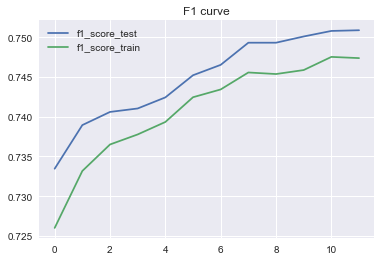

In [722]:
plt.plot(f1_score_test)
plt.plot(f1_score_train)
plt.legend(('f1_score_test','f1_score_train'))
plt.title('F1 curve')
plt.show()

### Model 19:SVM with L2 (PCA/Multi Classification)

In [723]:
f1_score_train = []
f1_score_test = []

chunksize = 5000

estimator = SGDClassifier(loss='hinge', penalty='l2', l1_ratio=0)
for i,chunk in enumerate(pd.read_csv('prosper_final_m.csv', chunksize=chunksize)):
    X_chunk = chunk.iloc[:,1:-1]
    y_chunk = chunk.iloc[:,-1]
    estimator.partial_fit(X_chunk,y_chunk, classes=np.unique(y_test))
    
    y_pred_test = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train)
    
    f_te = f1_score(y_test,y_pred_test,average='micro')
    f_ta = f1_score(y_train,y_pred_train,average='micro')
    
    f1_score_train.append(f_ta)
    f1_score_test.append(f_te)

    

In [724]:
print('Average f1 score :  {0:0.2f}' .format(sum(f1_score_test)/len(f1_score_test)))


Average f1 score :  0.86


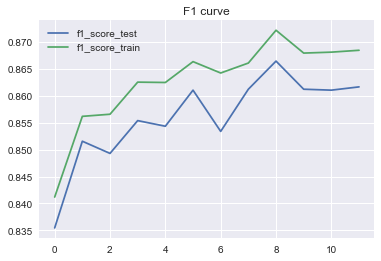

In [725]:
plt.plot(f1_score_test)
plt.plot(f1_score_train)
plt.legend(('f1_score_test','f1_score_train'))
plt.title('F1 curve')
plt.show()

### Model 20:Multi Layer Perceptron(PCA/Multi Classification)

In [726]:
from sklearn.neural_network import MLPClassifier

f1_score_train = []
f1_score_test = []

chunksize = 5000

estimator = MLPClassifier()
for i,chunk in enumerate(pd.read_csv('prosper_final_m.csv', chunksize=chunksize)):
    X_chunk = chunk.iloc[:,1:-1]
    y_chunk= chunk.iloc[:,-1]
    estimator.partial_fit(X_chunk,y_chunk,classes=np.unique(y_test))
    
    y_pred_test = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train)
    
    f_te = f1_score(y_test,y_pred_test,average='micro')
    f_ta = f1_score(y_train,y_pred_train,average='micro')
    
    f1_score_train.append(f_ta)
    f1_score_test.append(f_te)

In [727]:
print('Average f1 score :  {0:0.2f}' .format(sum(f1_score_test)/len(f1_score_test)))


Average f1 score :  0.84


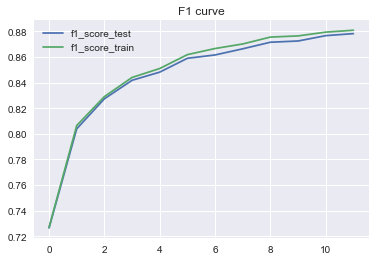

In [728]:
plt.plot(f1_score_test)
plt.plot(f1_score_train)
plt.legend(('f1_score_test','f1_score_train'))
plt.title('F1 curve')
plt.show()


## RESULT AND CONCLUSION

### BEST MODEL FOR BINARY CLASSIFICATION

### Model 12: Logistic Regression with L1(PCA/Binary Classification)

In [517]:
#Logistic Regression

auc_train = []
auc_test = []

chunksize = 5000

estimator = SGDClassifier(loss='log', penalty='l1', l1_ratio=1)
for i,chunk in enumerate(pd.read_csv('prosper_final.csv', chunksize=chunksize)):
    X_chunk = chunk.iloc[:,1:-1]
    y_chunk = chunk.iloc[:,-1]
    estimator.partial_fit(X_chunk,y_chunk, classes=np.unique(y_test))
    
    y_pred_test = estimator.predict_proba(X_test)[:,1]
    y_pred_train = estimator.predict_proba(X_train)[:,1]
    
    auc_tr=roc_auc_score(y_train,y_pred_train,average='micro')
    auc_te=roc_auc_score(y_test,y_pred_test, average='micro')
    
    auc_train.append(auc_tr)
    auc_test.append(auc_te)
    

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [518]:
print('Average AUC Score : {0:0.2f}' .format(sum(auc_test)/len(auc_test)))

Average AUC Score : 0.98


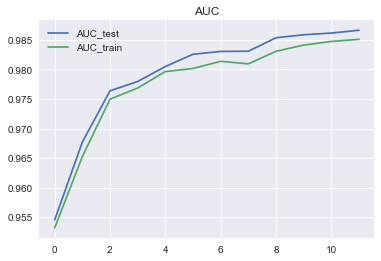

In [519]:
plt.plot(auc_train)
plt.plot(auc_test)
plt.legend(('AUC_test','AUC_train'))
plt.title('AUC')
plt.show()

Logistic regression model with L1 is the best model performer to predict the classes for the binary type classification. The average Area under the curve score indicates that the model correctly predicts the classes with a probability of around 0.98. The curve is gradually increasing with increase in number of iterations, which suggests that the model is a good performer in predicting the classes accurately.
The auc score of 0.98 is same prior and after applying pca which suggests that although the score being the same, pca aids in extracting only the required features which best explains the model thereby reducing the complexity of the model. 


### Model 10: Multi Layer Perceptron(Multi Classification)

In [541]:
from sklearn.neural_network import MLPClassifier

f1_score_train = []
f1_score_test = []

chunksize = 5000

estimator = MLPClassifier(hidden_layer_sizes=(2056,),alpha=0.1)
for i,chunk in enumerate(pd.read_csv('prosper_final_m_normal.csv', chunksize=chunksize)):
    X_chunk = chunk.iloc[:,1:-1]
    y_chunk= chunk.iloc[:,-1]
    estimator.partial_fit(X_chunk,y_chunk,np.unique(y_test))
    
    y_pred_test = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train)
    
    f_te = f1_score(y_test,y_pred_test,average='micro')
    f_ta = f1_score(y_train,y_pred_train,average='micro')
    
    f1_score_train.append(f_ta)
    f1_score_test.append(f_te)

In [542]:
print('Average f1 score :  {0:0.2f}' .format(sum(f1_score_test)/len(f1_score_test)))


Average f1 score :  0.93


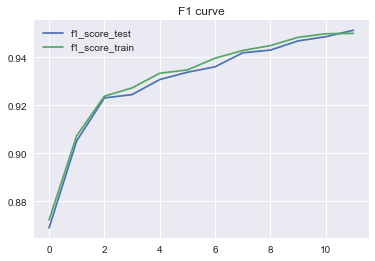

In [543]:
plt.plot(f1_score_test)
plt.plot(f1_score_train)
plt.legend(('f1_score_test','f1_score_train'))
plt.title('F1 curve')
plt.show()

For the multi-class classification, MLP Classifier has the highest f1 score among the classifiers. It is the weighted average of precision and recall score for each class in a multi class scenario.  F1 score indicates to what extent the model correctly predicts all the classes (multi class case). Closer the score to 1, better is the model performance.
Although SVM with L1 penalty has a similar score, comparing the graphs of both the classifiers over a number of iterations we can infer that the MLP has a comparatively smoother curve, which indicates its robustness towards partial fit.

It was noted that the f1 score for MLP Classifier reduced when the features where trained into the model after applying PCA. This might be for the reason that, since the target variable has 11 unbalanced classes, it probably requires initial number of features (prior application of pca) to have a good performance on the data. 
